## Multiple Linear Regression

We will explore how to perform Multiple Linear Regression using the following approaches:

### 1. Build a Multiple Linear Regression Model using statsmodels
- **Load the data**
- **Understanding the data** (EDA)
- **Data Preparation** (Train-Test Split)
- **Use statsmodels** to train the model
- **Manual Feature Selection** based on p-value and VIF (Forward Feature Selection, Backward Feature Selection)
- **Residual Analysis** on Train Data
- **Prediction** on Test Data
- **Evaluation**: RMSE, R-squared

### 2. Build a MLR Model using sklearn
- **Load the data**
- **Understanding the data** (EDA)
- **Data Preparation** (Train-Test Split)
- **Use sklearn** to train the model
- **Residual Analysis** on Train Data
- **Prediction** on Test Data
- **Evaluation**: RMSE, R-squared

### 3. Feature Selection and Dimensionality Reduction
- **Automatic Feature Selection** using RFE
- **Dimensionality Reduction** with PCA
- **Feature Selection** using Lasso Regularisation
- **Feature Importance** using Ensembles


## Boston House Prices Dataset  

The Boston House Prices dataset contains information about housing in Boston, including 506 instances and 13 predictive attributes. The target variable is the median value of owner-occupied homes (in $1000s).  

### Features:  
- **CRIM**: Per capita crime rate by town  
- **ZN**: Proportion of residential land zoned for large lots  
- **INDUS**: Proportion of non-retail business acres per town  
- **CHAS**: Charles River dummy variable (1 if tract bounds river, 0 otherwise)  
- **NOX**: Nitric oxides concentration  
- **RM**: Average number of rooms per dwelling  
- **AGE**: Proportion of owner-occupied units built before 1940  
- **DIS**: Weighted distances to employment centers  
- **RAD**: Accessibility index to radial highways  
- **TAX**: Property tax rate per $10,000  
- **PTRATIO**: Pupil-teacher ratio by town  
- **B**: 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents  
- **LSTAT**: Percentage of lower-status population  

The dataset has no missing values and is commonly used for regression tasks.  


In [124]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv('data/boston.csv')

df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [127]:
df.shape

(506, 14)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [129]:
df.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
PRICE    506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
PRICE     25.000000   50.0000

In [130]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [131]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

# Univariate analysis 

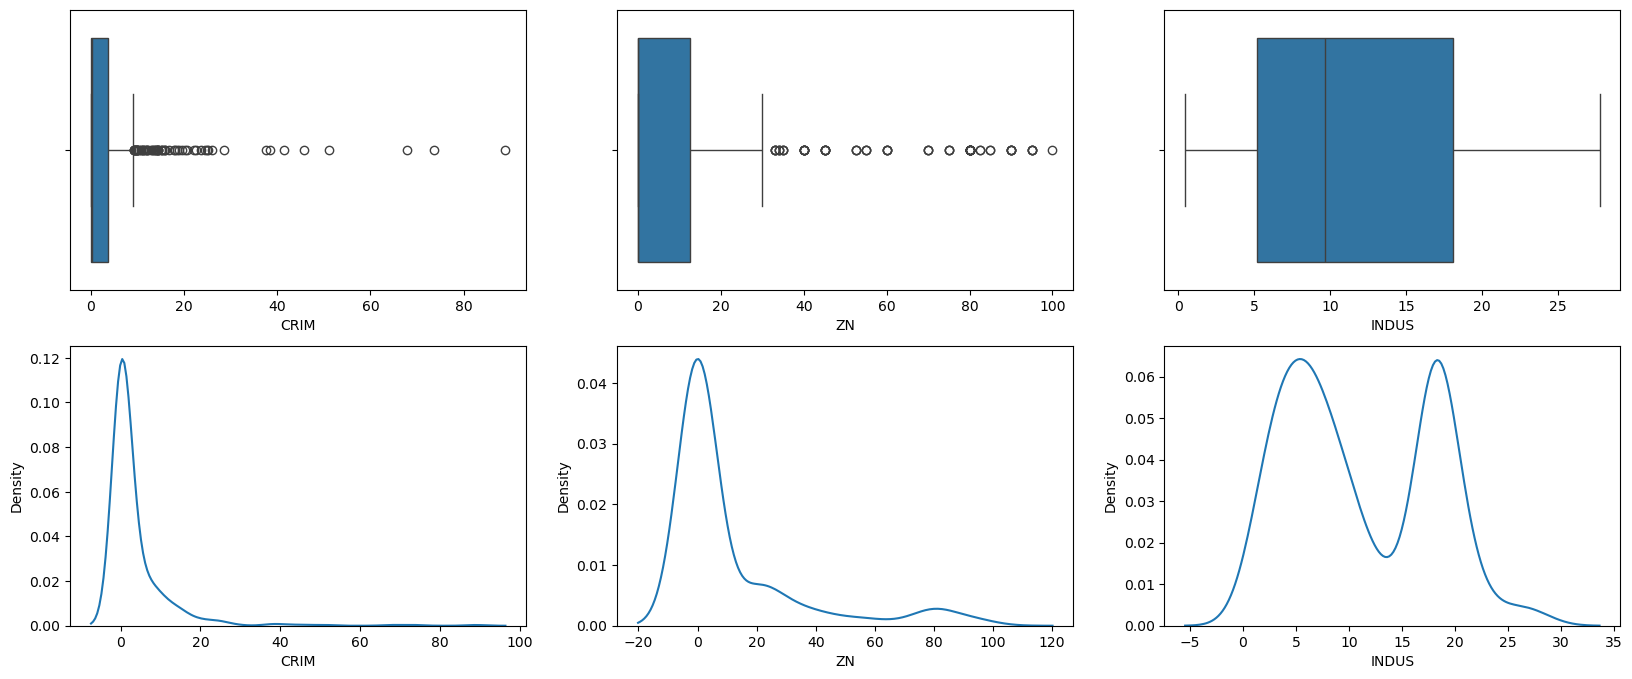

In [132]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(df['CRIM'], orient = 'h')

plt.subplot(2,3,2)
sns.boxplot(df['ZN'], orient = 'h')

plt.subplot(2,3,3)
sns.boxplot(df['INDUS'], orient = 'h')

plt.subplot(2,3,4)
sns.kdeplot(df['CRIM'])

plt.subplot(2,3,5)
sns.kdeplot(df['ZN'])

plt.subplot(2,3,6)
sns.kdeplot(df['INDUS'])

plt.show()

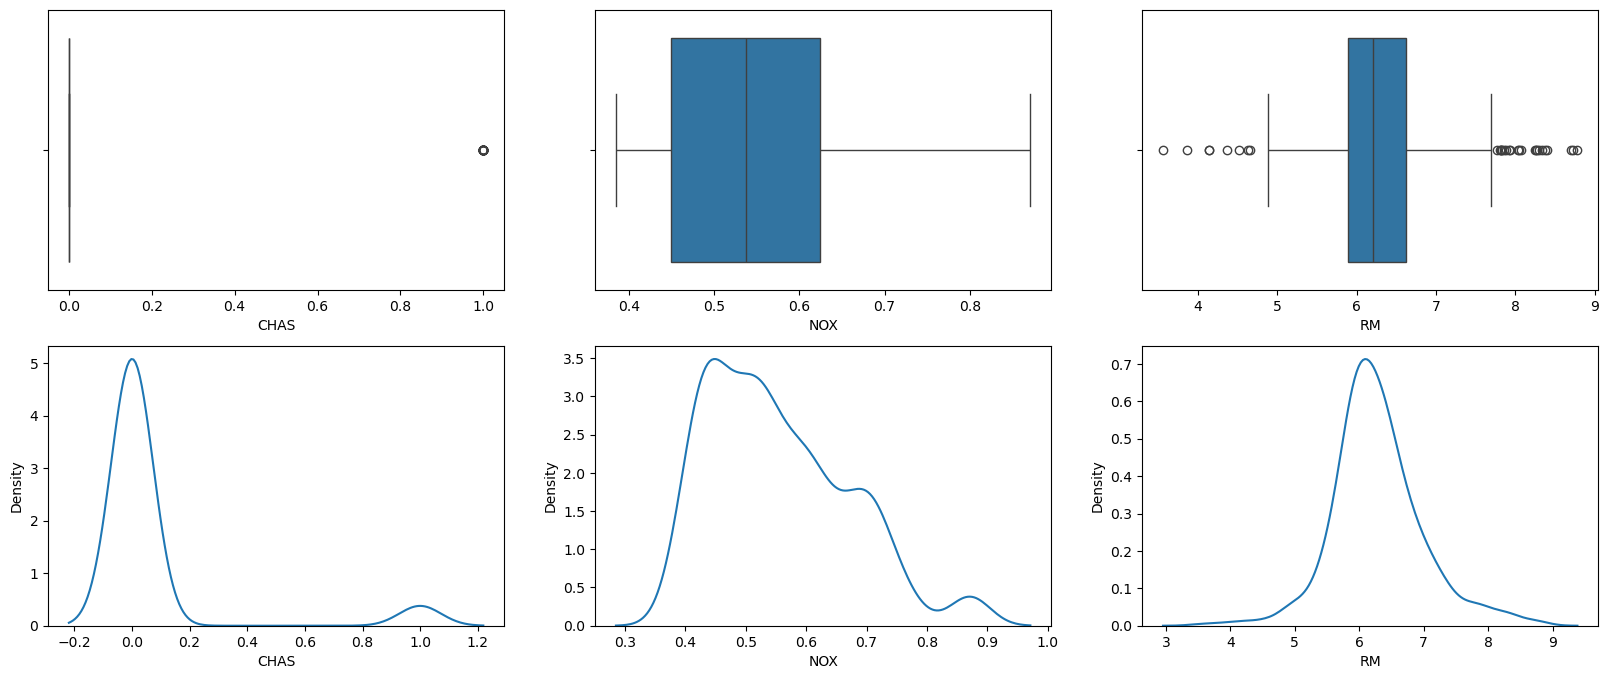

In [133]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(df['CHAS'], orient = 'h')

plt.subplot(2,3,2)
sns.boxplot(df['NOX'], orient = 'h')

plt.subplot(2,3,3)
sns.boxplot(df['RM'], orient = 'h')

plt.subplot(2,3,4)
sns.kdeplot(df['CHAS'])

plt.subplot(2,3,5)
sns.kdeplot(df['NOX'])

plt.subplot(2,3,6)
sns.kdeplot(df['RM'])

plt.show()

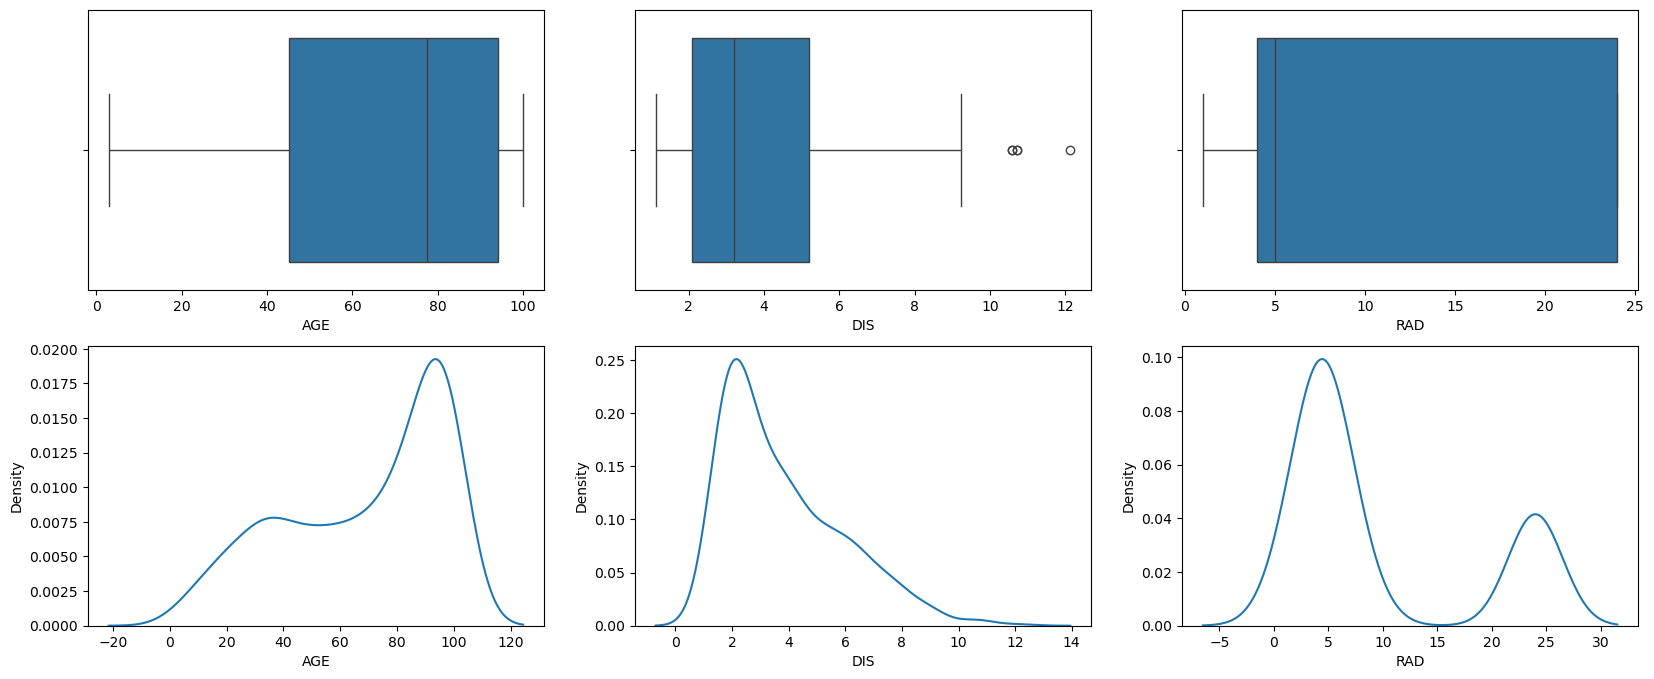

In [134]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(df['AGE'], orient = 'h')

plt.subplot(2,3,2)
sns.boxplot(df['DIS'], orient = 'h')

plt.subplot(2,3,3)
sns.boxplot(df['RAD'], orient = 'h')

plt.subplot(2,3,4)
sns.kdeplot(df['AGE'])

plt.subplot(2,3,5)
sns.kdeplot(df['DIS'])

plt.subplot(2,3,6)
sns.kdeplot(df['RAD'])

plt.show()

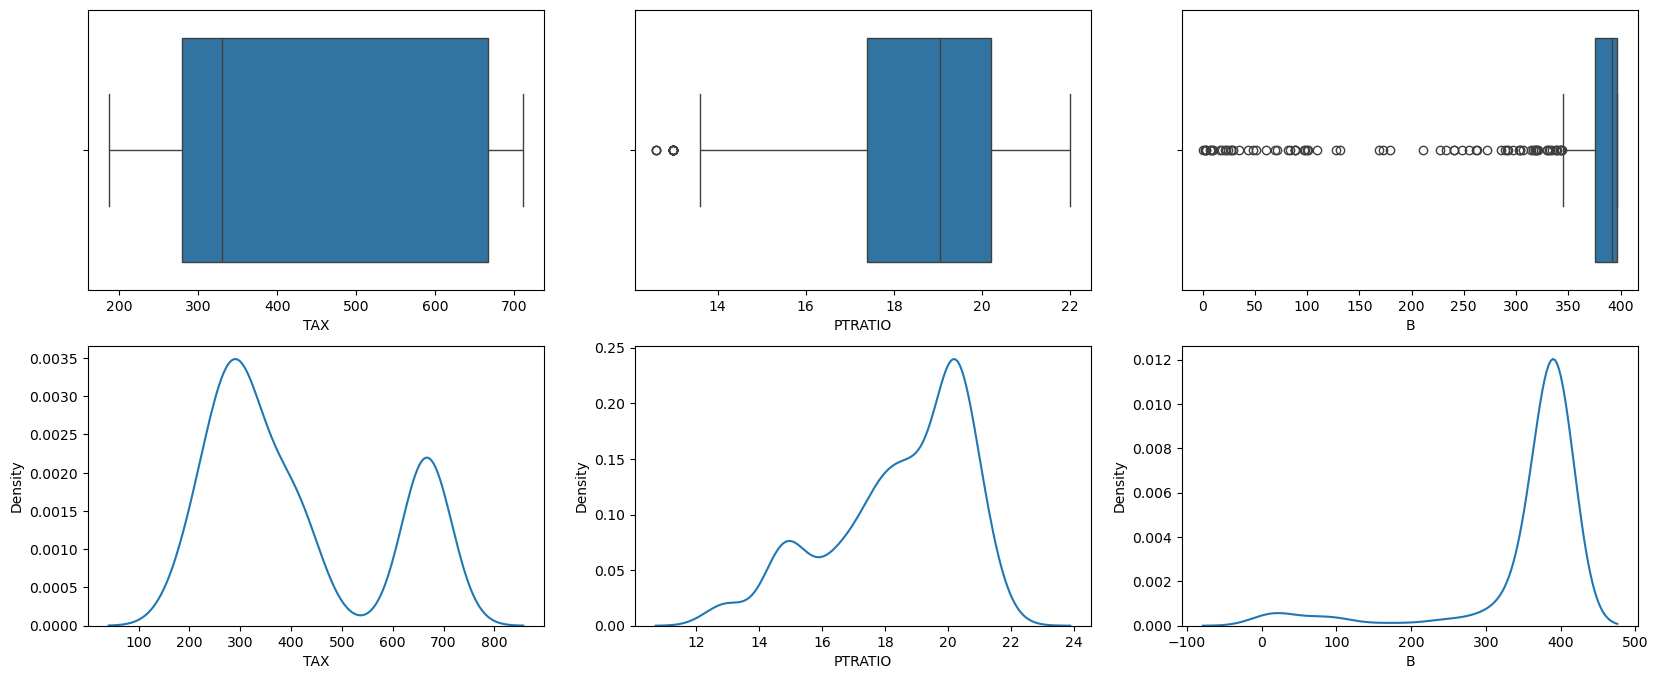

In [135]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)
sns.boxplot(df['TAX'], orient = 'h')

plt.subplot(2,3,2)
sns.boxplot(df['PTRATIO'], orient = 'h')

plt.subplot(2,3,3)
sns.boxplot(df['B'], orient = 'h')

plt.subplot(2,3,4)
sns.kdeplot(df['TAX'])

plt.subplot(2,3,5)
sns.kdeplot(df['PTRATIO'])

plt.subplot(2,3,6)
sns.kdeplot(df['B'])

plt.show()

In [136]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

<Axes: xlabel='PRICE', ylabel='Density'>

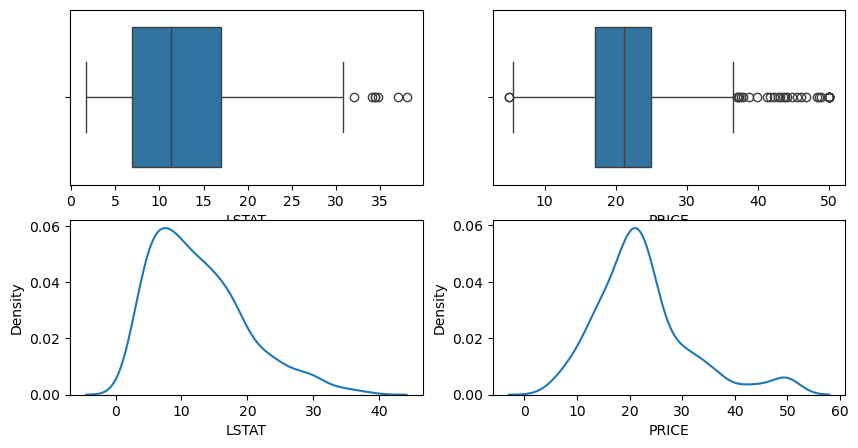

In [137]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.boxplot(df['LSTAT'], orient = 'h')

plt.subplot(2,2,2)
sns.boxplot(df['PRICE'], orient = 'h')

plt.subplot(2,2,3)
sns.kdeplot(df['LSTAT'])

plt.subplot(2,2,4)
sns.kdeplot(df['PRICE'])

In [138]:
def IQR(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the column's median
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])

In [139]:
# Applied once 

IQR(df, 'CRIM')

In [140]:
# Applied twice 

IQR(df, 'CRIM')

In [141]:
# Applied three times 

IQR(df, 'CRIM')

In [142]:
# Applied once 

IQR(df, 'ZN')

In [143]:
# Applied twice 

IQR(df, 'ZN')

In [144]:
IQR(df, 'INDUS')

In [145]:
IQR(df, 'CHAS')

In [146]:
# Applied once 

IQR(df, 'RM')

In [147]:
# Applied twice 

IQR(df, 'RM')

In [148]:
# Applied once 

IQR(df, 'DIS')

In [149]:
# Applied once 

IQR(df, 'PTRATIO')

In [150]:
# Applied once 

IQR(df, 'B')

In [151]:
# Applied twice 

IQR(df, 'B')

In [152]:
# Applied three time 

IQR(df, 'B')

In [153]:
# Applied once 

IQR(df, 'LSTAT')

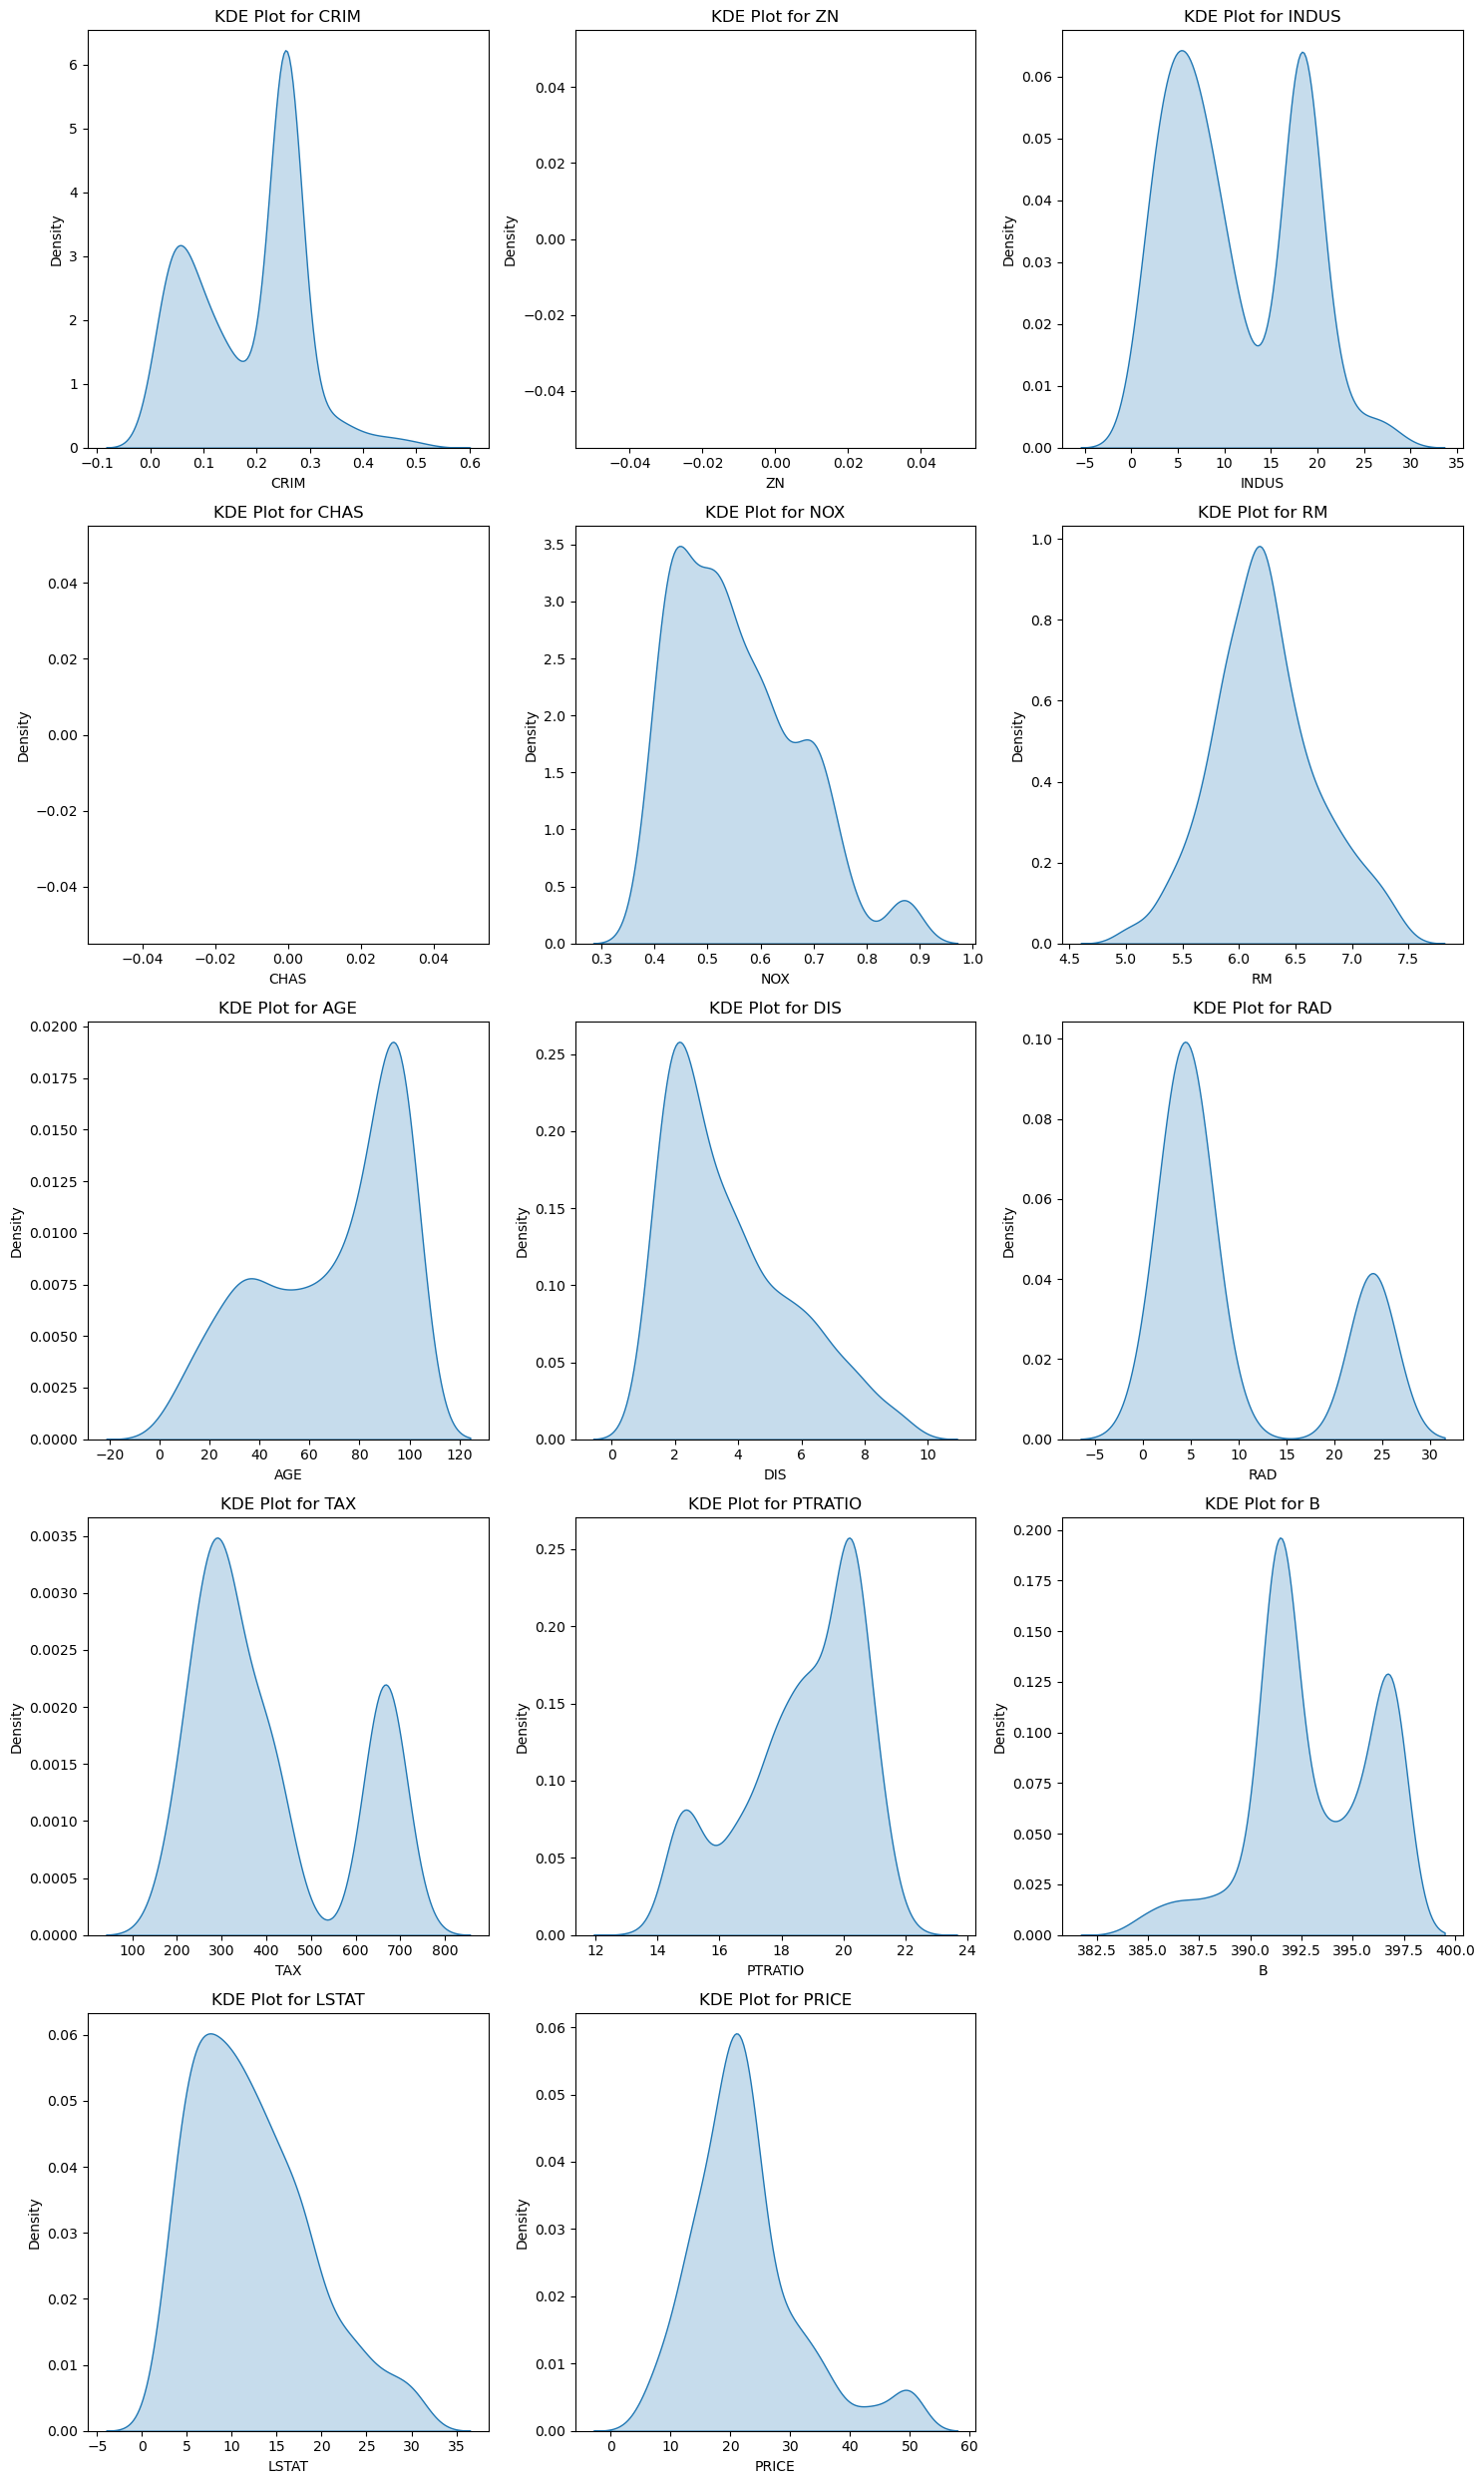

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of rows and columns for the subplots grid
n_cols = 3 
n_rows = (len(df.columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], shade=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [164]:
from scipy.stats import boxcox

# Apply Box-Cox transformation on 'LSTAT' column
df['PTRATIO'], lam = boxcox(df['PTRATIO'])  

In [156]:
from scipy.stats import boxcox

# Apply Box-Cox transformation on 'NOX' column
df['NOX'], lam = boxcox(df['NOX'])  

In [160]:
from scipy.stats import boxcox

# Apply Box-Cox transformation on 'DIS' column
df['DIS'], lam = boxcox(df['DIS'])  

In [ ]:
from scipy.stats import boxcox

# Apply Box-Cox transformation on 'LSTAT' column
df['LSTAT'], lam = boxcox(df['LSTAT'])  

In [ ]:
sns.kdeplot(df['LSTAT'], shade = True)

In [162]:
from scipy.stats import boxcox

# Apply Box-Cox transformation on 'LSTAT' column
df['LSTAT'], lam = boxcox(df['LSTAT'])  

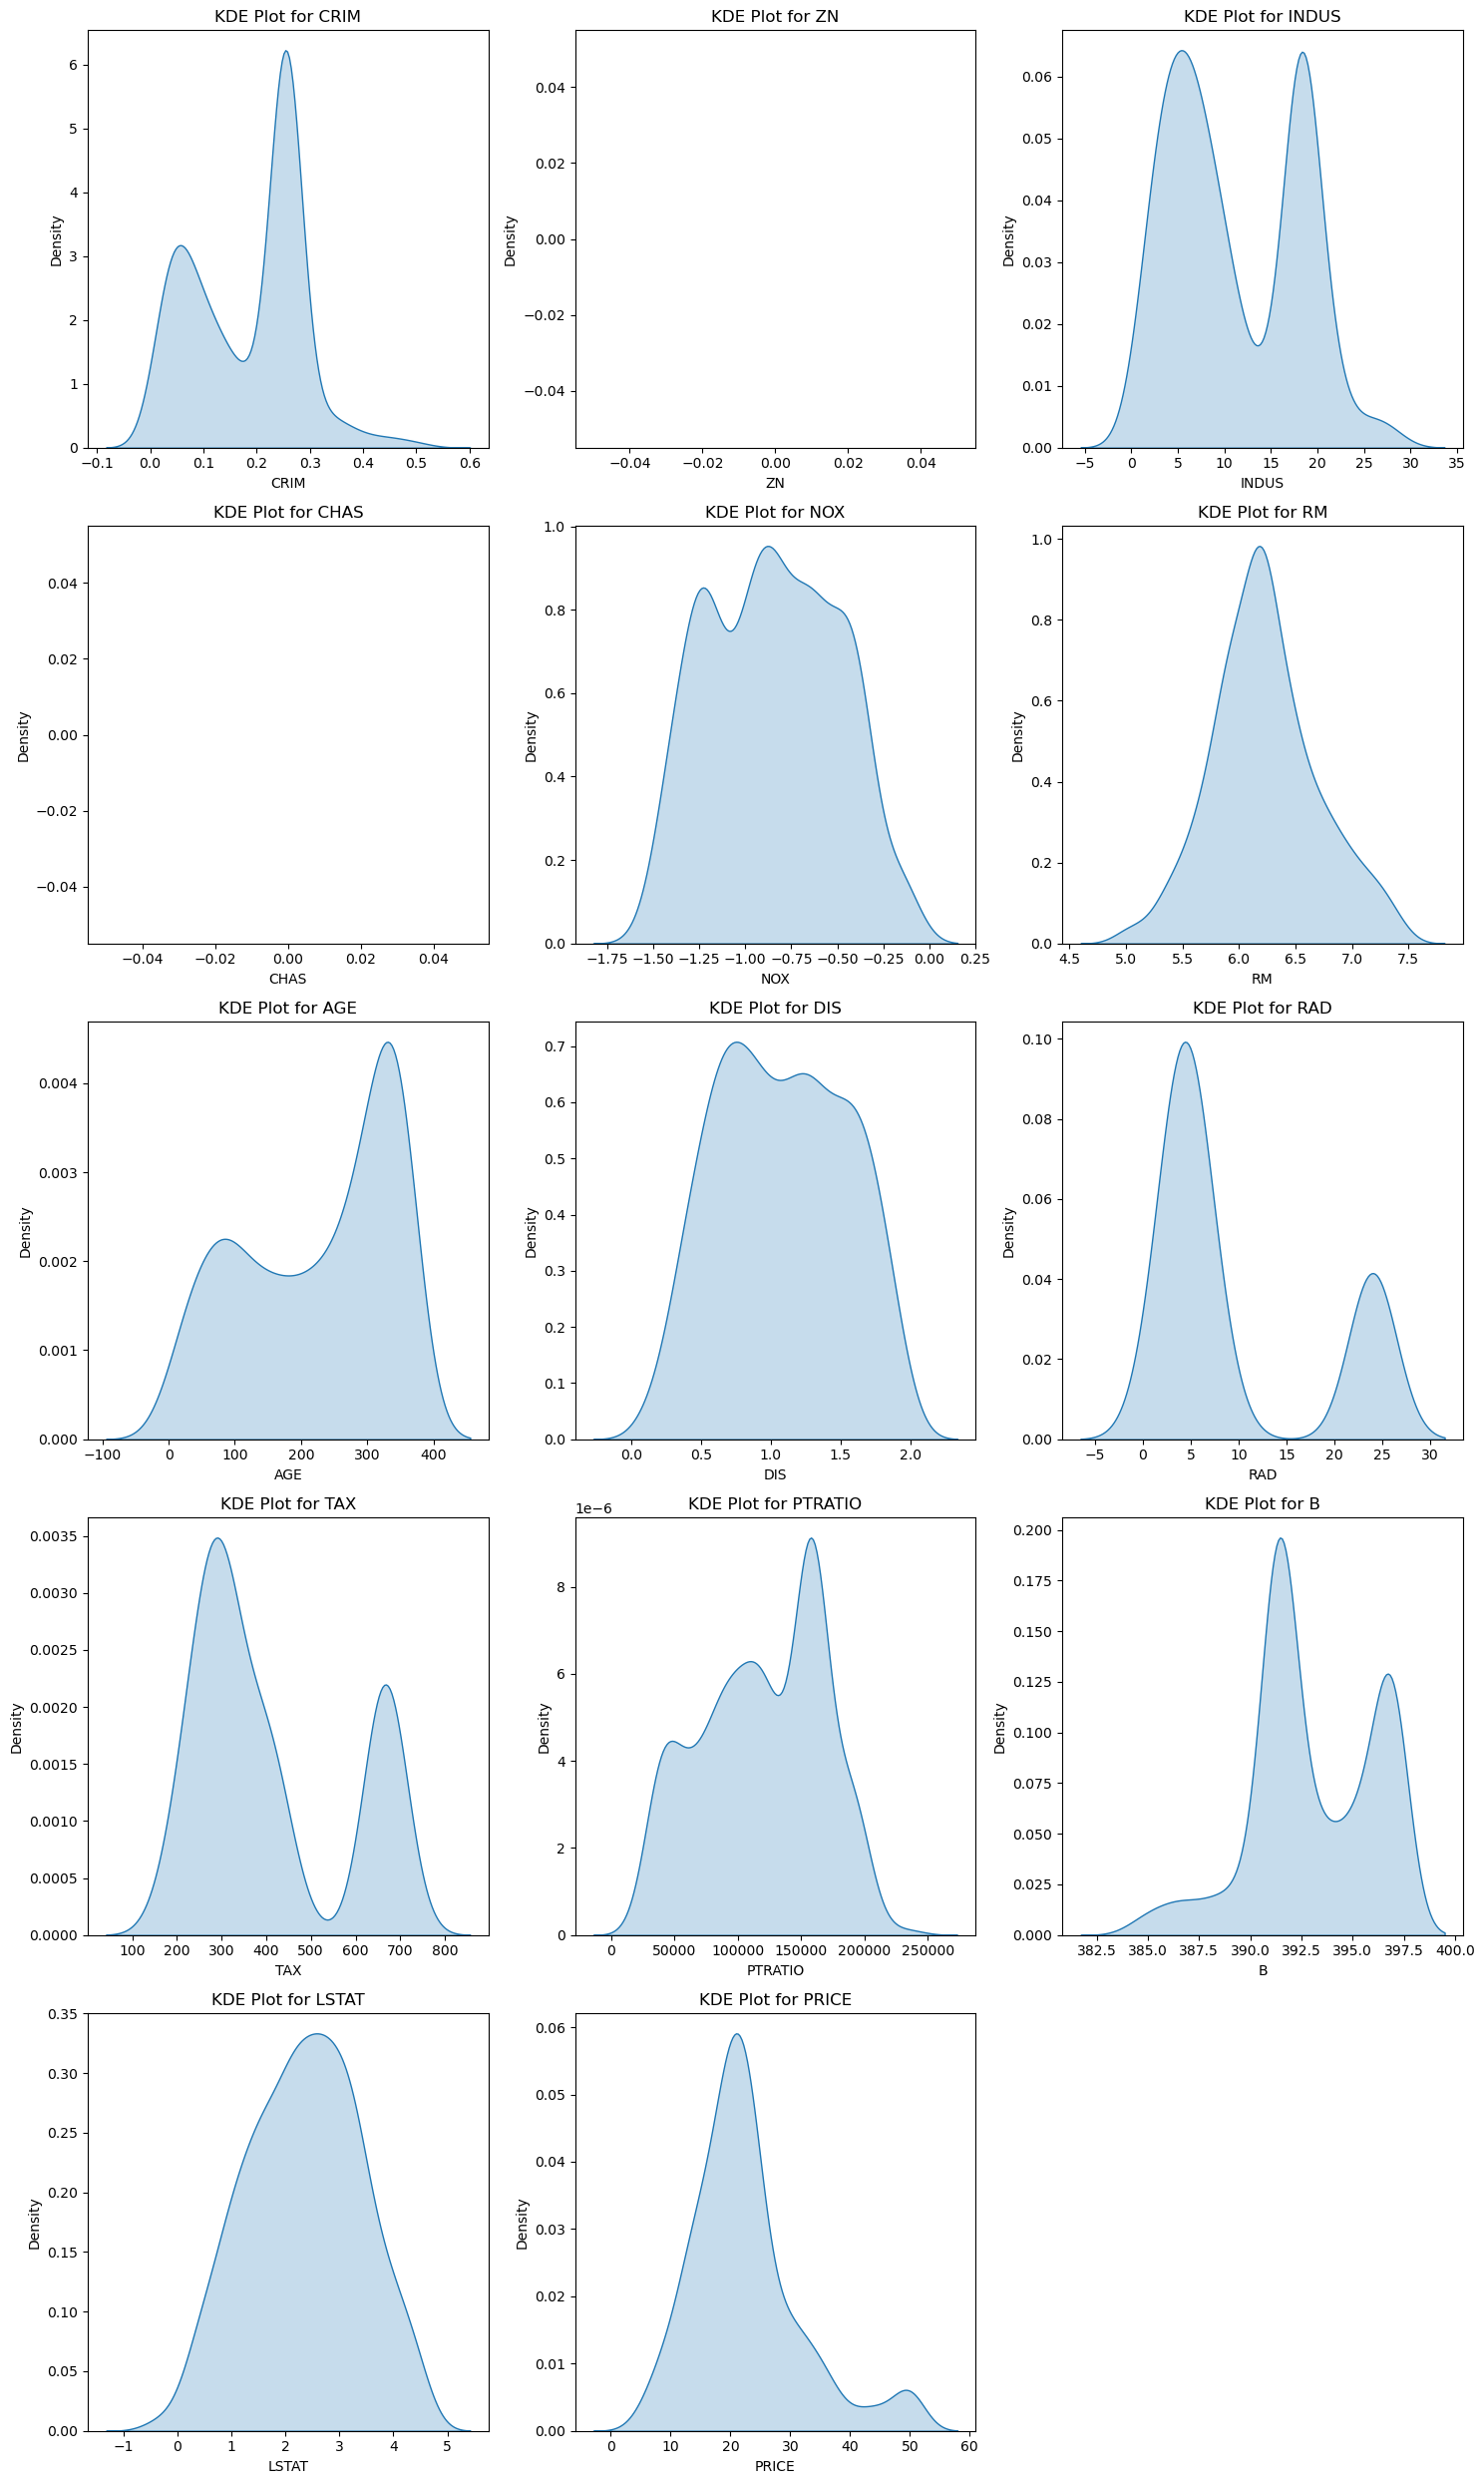

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of rows and columns for the subplots grid
n_cols = 3 
n_rows = (len(df.columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], shade=True, ax=axes[i])
    axes[i].set_title(f'KDE Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [179]:
df = df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']]

In [180]:
df.corr()

CRIM     INDUS       NOX        RM       AGE       DIS       RAD  \
CRIM     1.000000  0.547746  0.652464 -0.242035  0.590562 -0.556726  0.468542   
INDUS    0.547746  1.000000  0.784506 -0.343462  0.662029 -0.752304  0.595129   
NOX      0.652464  0.784506  1.000000 -0.276356  0.796153 -0.863153  0.625508   
RM      -0.242035 -0.343462 -0.276356  1.000000 -0.230313  0.235284 -0.084283   
AGE      0.590562  0.662029  0.796153 -0.230313  1.000000 -0.775530  0.465845   
DIS     -0.556726 -0.752304 -0.863153  0.235284 -0.775530  1.000000 -0.565516   
RAD      0.468542  0.595129  0.625508 -0.084283  0.465845 -0.565516  1.000000   
TAX      0.465086  0.720760  0.674801 -0.166065  0.521400 -0.630822  0.910228   
PTRATIO  0.354978  0.380317  0.376948 -0.170682  0.363630 -0.357164  0.472208   
B       -0.134768 -0.095452 -0.113780 -0.027309 -0.083347  0.072866 -0.081552   
LSTAT    0.447721  0.597261  0.599165 -0.507233  0.612171 -0.508264  0.450363   
PRICE   -0.271229 -0.483725 -0.428523  0.435631 -0.384049  0.302638 -0.381626   

              TAX   PTRATIO         B     LSTAT     PRICE  
CRIM     0.465086  0.354978 -0.134768  0.447721 -0.271229  
INDUS    0.720760  0.380317 -0.095452  0.597261 -0.483725  
NOX      0.674801  0.376948 -0.113780  0.599165 -0.428523  
RM      -0.166065 -0.170682 -0.027309 -0.507233  0.435631  
AGE      0.521400  0.363630 -0.083347  0.612171 -0.384049  
DIS     -0.630822 -0.357164  0.072866 -0.508264  0.302638  
RAD      0.910228  0.472208 -0.081552  0.450363 -0.381626  
TAX      1.000000  0.478157 -0.085201  0.513871 -0.468536  
PTRATIO  0.478157  1.000000  0.006640  0.410998 -0.442897  
B       -0.085201  0.006640  1.000000 -0.007257 -0.102496  
LSTAT    0.513871  0.410998 -0.007257  1.000000 -0.795966  
PRICE   -0.468536 -0.442897 -0.102496 -0.795966  1.000000

<Axes: >

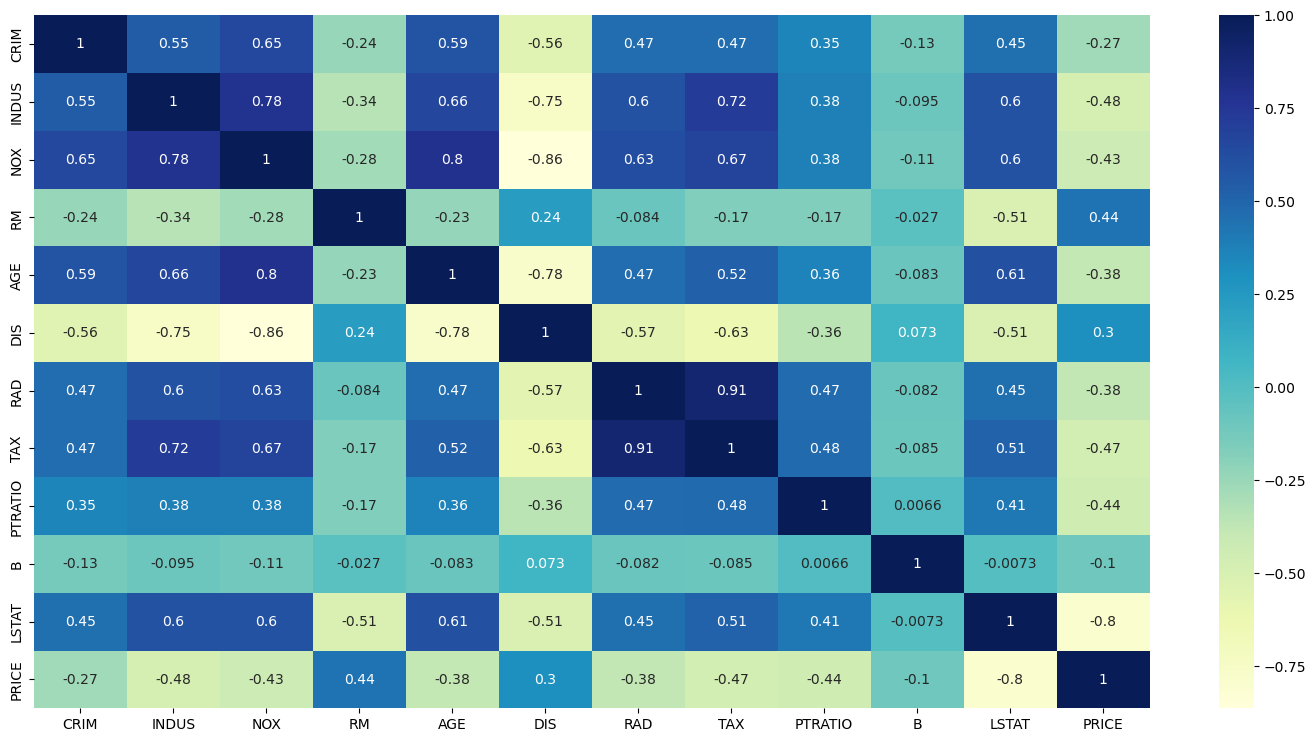

In [181]:
plt.figure(figsize=(18, 9))

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

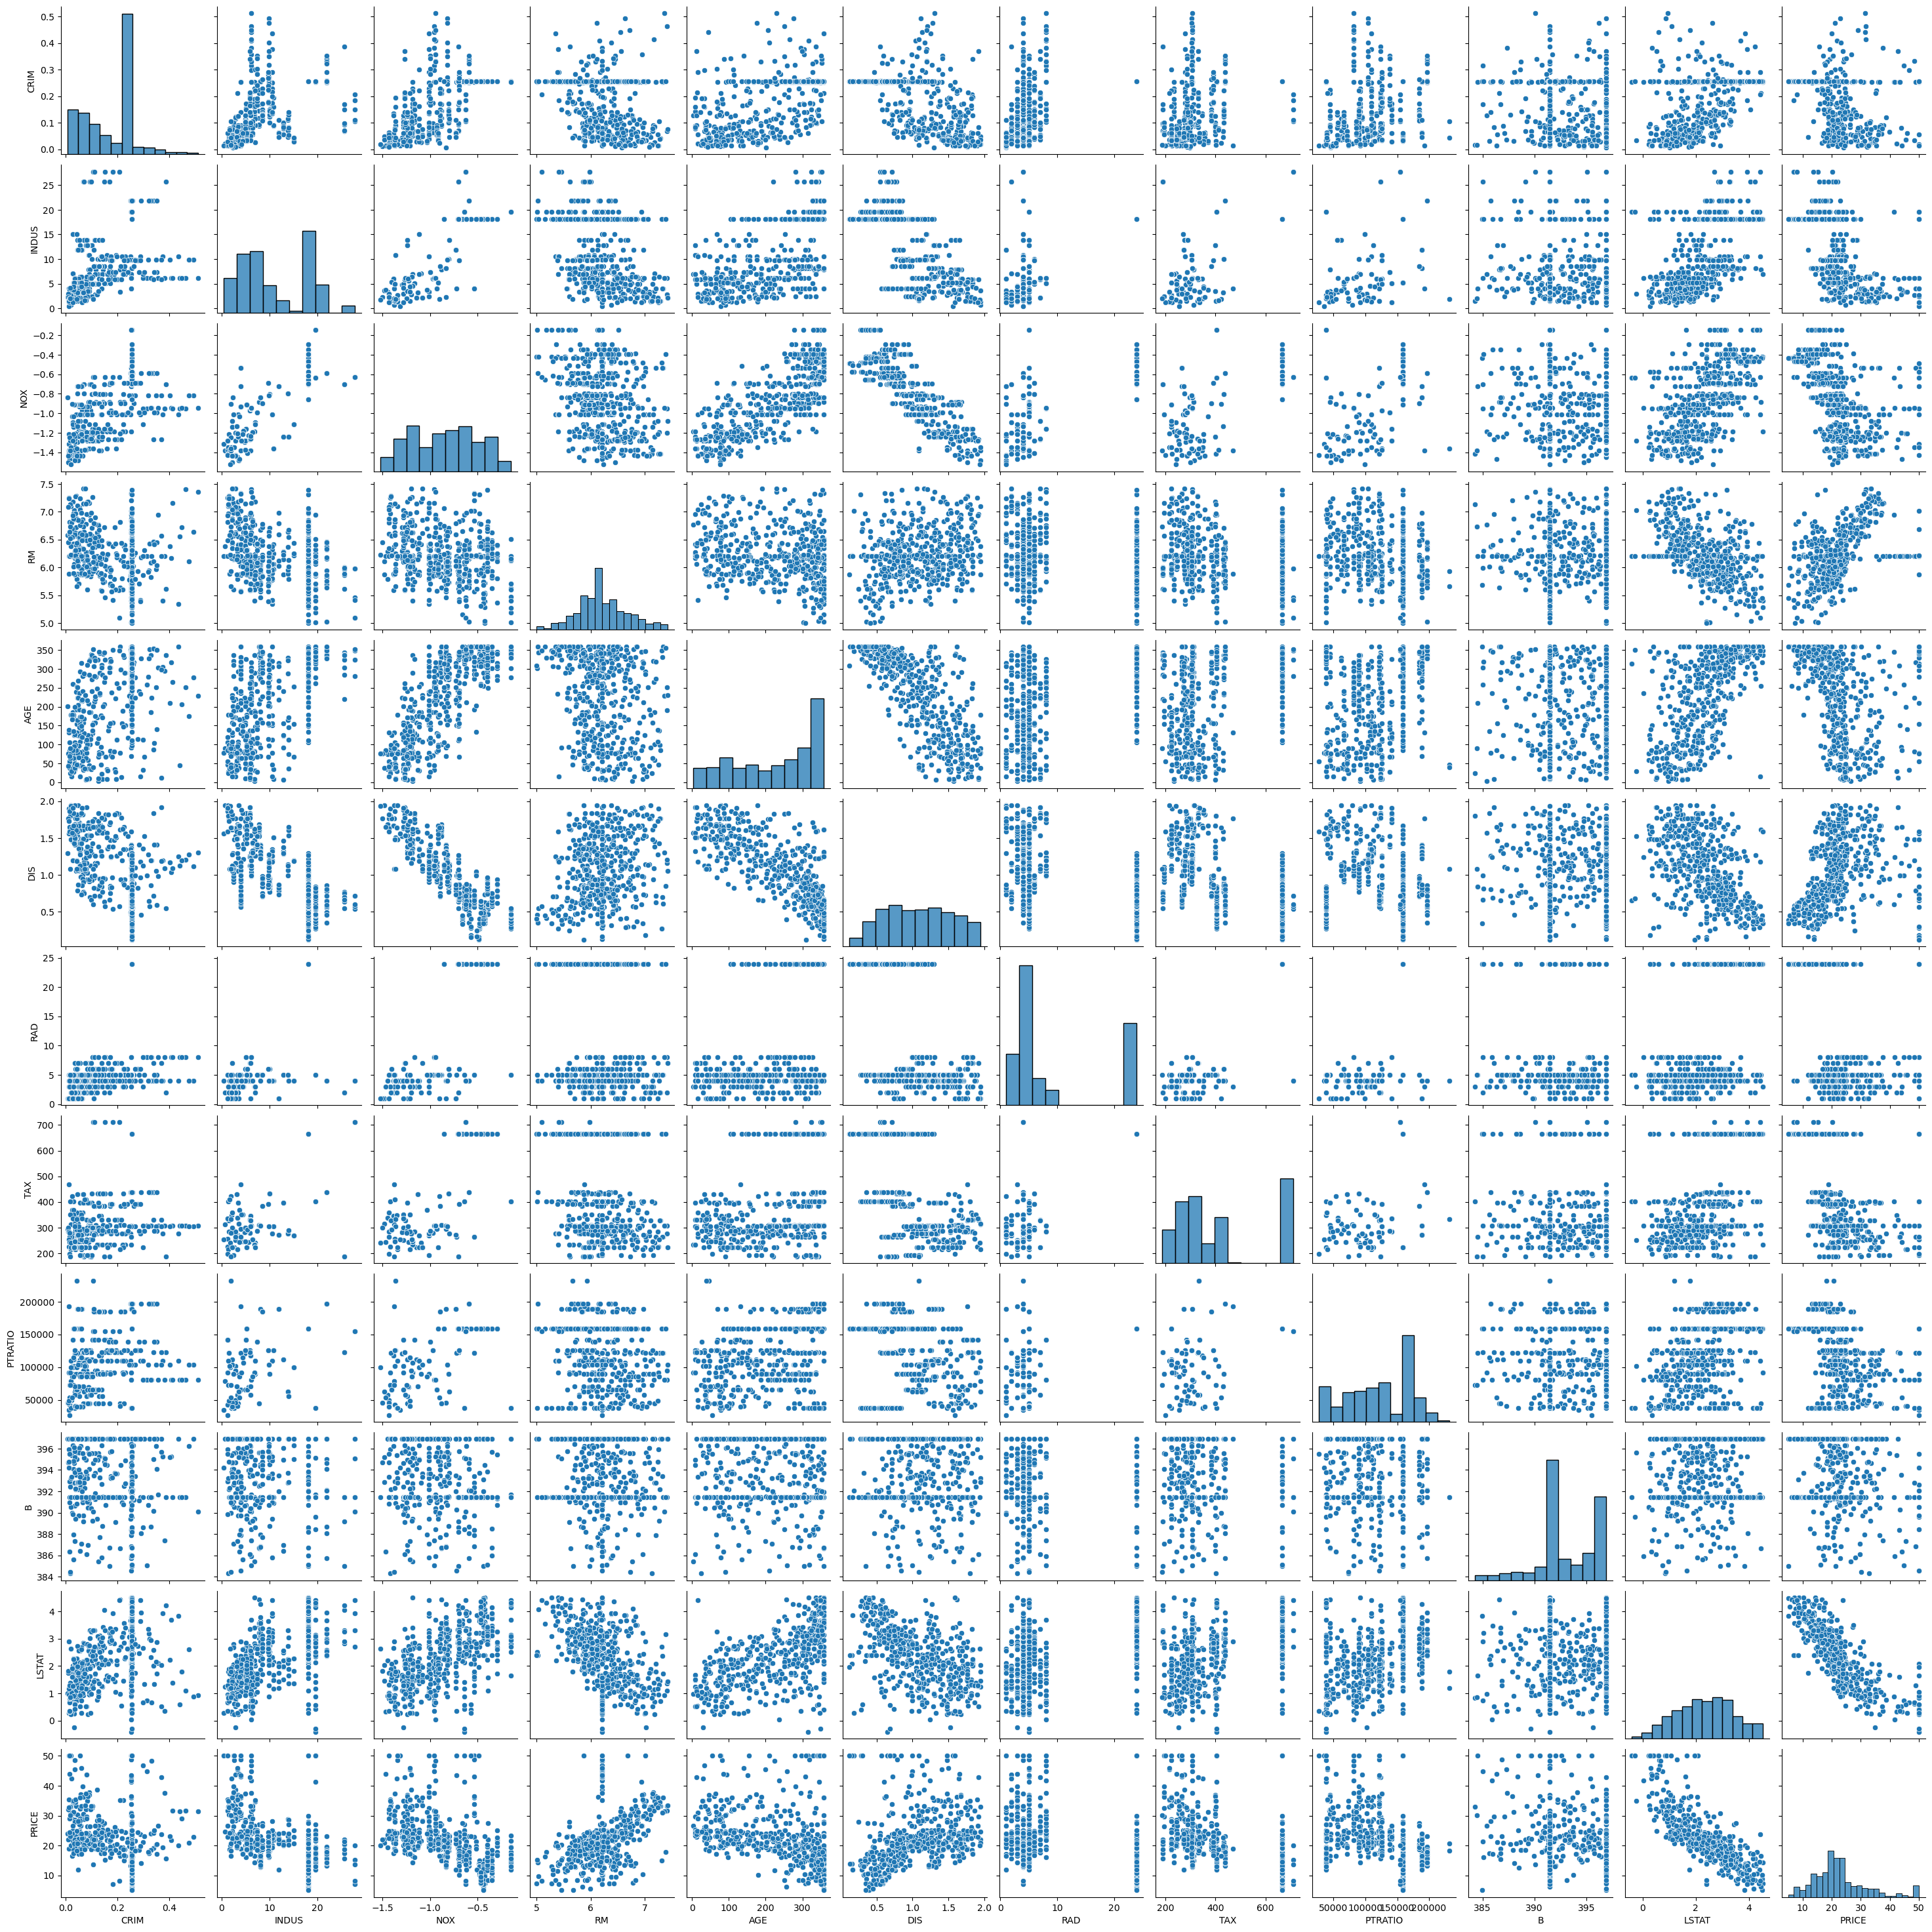

In [183]:
sns.pairplot(df)

plt.show()

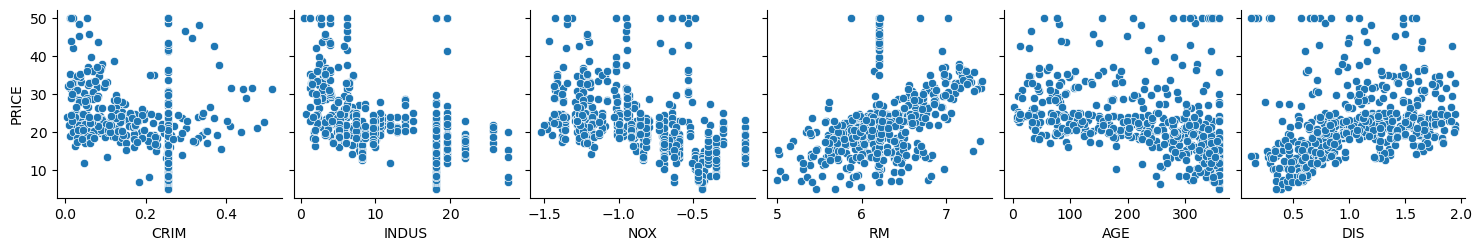

In [184]:
sns.pairplot(data = df,
            x_vars = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS'],
            y_vars = 'PRICE')

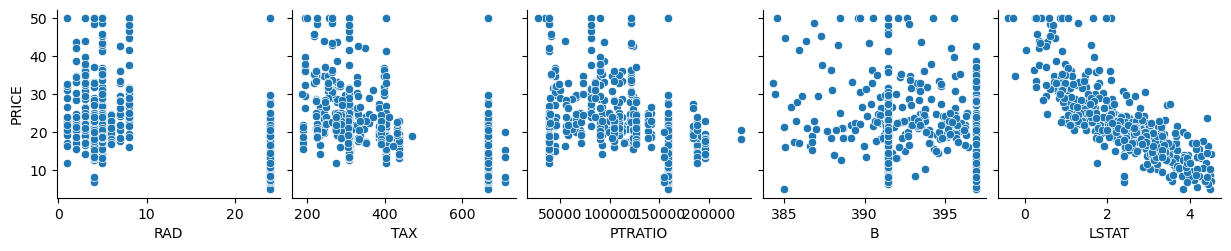

In [185]:
sns.pairplot(data = df,
            x_vars = ['RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
            y_vars = 'PRICE')

## Building model using Sklearn
1. Load the data
2. Understanding the data (EDA)
3. Data Preparation (Train Test Split)
4. Use sklearn in order to train the model
5. Resdual Analysis on Train Data
6. Prediction on Test Data
7. Evaluation - (RMSE, R_squared)

In [195]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [198]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (404, 11)
Test data shape: (102, 11)


In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)

In [201]:
X_test_transformed = scaler.transform(X_test)

## Linear regression

In [220]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [207]:
# Define the parameter grid
tuned_parameters = [{'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}]  # Example grid for alpha, adjust as needed

lr = GridSearchCV(
    estimator=Lasso(), 
    param_grid=tuned_parameters, 
    scoring=r2_score,  
    cv=5,
    return_train_score=True,
    verbose=1
)

# Fit the model
lr.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}],
             return_train_score=True,
             scoring=<function r2_score at 0x33891f760>, verbose=1)

In [211]:
print("Best parameters set found on train set:")
print(lr.best_params_)
print(lr.best_estimator_)

Best parameters set found on train set:
{'alpha': 0.01}
Lasso(alpha=0.01)


In [212]:
from sklearn.metrics import r2_score

# Get the best model after GridSearchCV
best_model = lr.best_estimator_

# Get predictions from the best model on test data
y_pred_test = best_model.predict(X_test_transformed)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_test)

# Get the number of samples (n) and features (p)
n = X_test_transformed.shape[0]  # Number of test samples
p = X_test_transformed.shape[1]  # Number of features (predictors)

# Calculate Adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the Adjusted R-squared on test data
print(f"Adjusted R-squared on Test Data: {adj_r2}")

Adjusted R-squared on Test Data: 0.6580369797040226


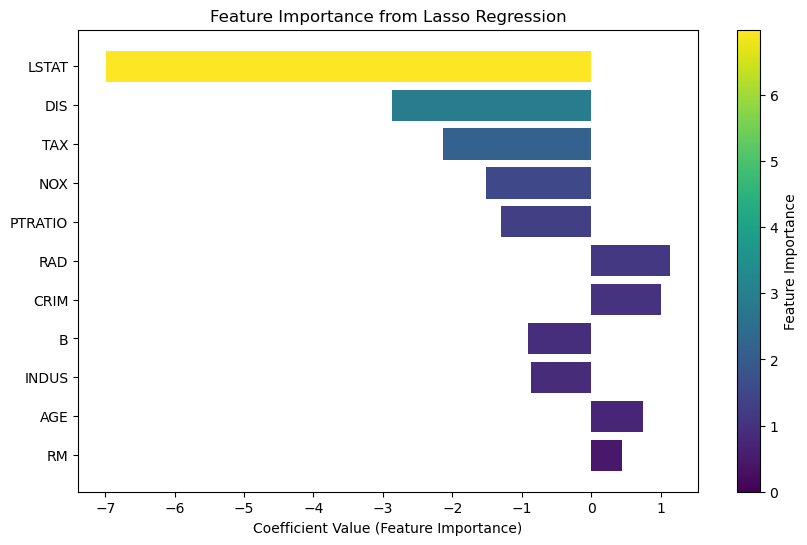

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Get the best model from GridSearchCV
best_model = lr.best_estimator_

# Get feature coefficients (importance)
coef = best_model.coef_

# Get the feature names (assuming X_train_transformed is a DataFrame)
feature_names = X.columns  # Assuming X_train_transformed is a DataFrame

# Sort features by their importance (absolute value of the coefficients) in ascending order
sorted_idx = np.argsort(np.abs(coef))  # Sorted in ascending order

# Plotting with color gradient based on importance
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(feature_names[sorted_idx], coef[sorted_idx], align='center', 
               color=plt.cm.viridis(np.abs(coef[sorted_idx]) / np.max(np.abs(coef[sorted_idx]))))

# Adding color bar to indicate the scale of importance
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=np.max(np.abs(coef))))
sm.set_array([])  # This is needed for the color bar to display correctly
fig.colorbar(sm, ax=ax, label='Feature Importance')

ax.set_xlabel('Coefficient Value (Feature Importance)')
ax.set_title('Feature Importance from Lasso Regression')
plt.show()


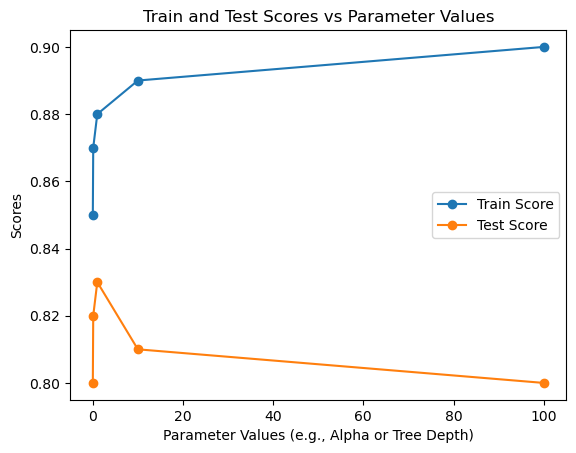

In [231]:
import matplotlib.pyplot as plt

# Replace these with your actual values
# 'values' would be the parameter values you're tuning (e.g., alpha values, tree depths, etc.)
values = [0.01, 0.1, 1.0, 10.0, 100.0]  # Example parameter values (e.g., alpha values for Lasso)
train_scores = [0.85, 0.87, 0.88, 0.89, 0.90]  # Example train scores
test_scores = [0.80, 0.82, 0.83, 0.81, 0.80]  # Example test scores

# Plotting the scores vs parameter values (tree depth or alpha)
plt.plot(values, train_scores, '-o', label='Train Score')
plt.plot(values, test_scores, '-o', label='Test Score')

# Add labels and title
plt.xlabel('Parameter Values (e.g., Alpha or Tree Depth)')
plt.ylabel('Scores')
plt.title('Train and Test Scores vs Parameter Values')

# Show the legend
plt.legend()

# Display the plot
plt.show()


## KNN

In [235]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(1, 51)),  # Testing k from 1 to 50
    'weights': ['uniform', 'distance'],  # Weighting strategies
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Grid Search with Cross-Validation
knn_grid = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='r2',  
    cv=5,
    return_train_score=True,
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the model on training data
knn_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2', verbose=1)

In [239]:
print("Best parameters set found on train set:")
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

Best parameters set found on train set:
{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
KNeighborsRegressor(n_neighbors=4, p=1, weights='distance')


In [240]:
# Evaluate on test data
test_score = knn_grid.best_estimator_.score(X_test_transformed, y_test)
print("Test R² score:", test_score)

Test R² score: 0.8010453787976555


## DT

In [238]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum samples in a leaf node
}

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Grid Search with Cross-Validation
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='r2',  # Use 'neg_root_mean_squared_error' for RMSE
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
dt_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [241]:
print("Best parameters set found on train set:")
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)

Best parameters set found on train set:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeRegressor(max_depth=5, random_state=42)


In [261]:
# Evaluate performance using R²
train_score = dt_grid.score(X_train_transformed, y_train)
test_score = dt_grid.score(X_test_transformed, y_test)

# Print results
print("Train R² score:", train_score)
print("Test R² score:", test_score)

Train R² score: 0.9050419920002969
Test R² score: 0.6140613746266433


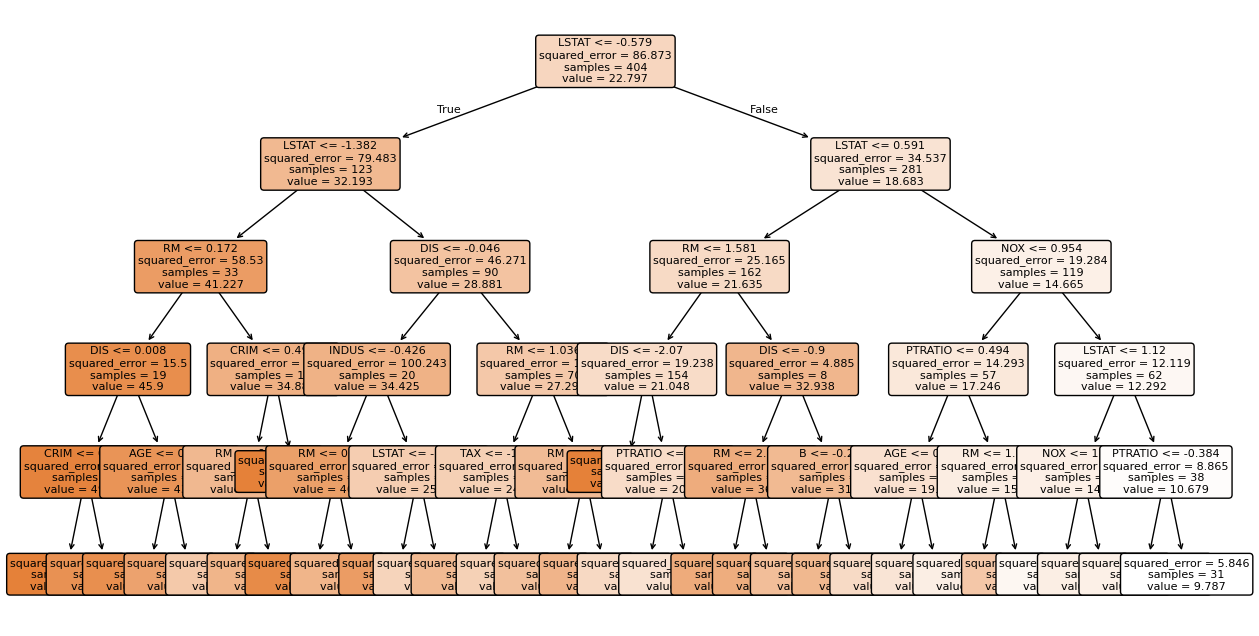

In [247]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the best decision tree model from GridSearchCV
best_dt = dt_grid.best_estimator_

# Set figure size
plt.figure(figsize=(15, 8))

# Plot the decision tree
plot_tree(
    best_dt, 
    feature_names=X_train.columns,  # Use actual feature names
    filled=True, 
    rounded=True, 
    fontsize=8
)

# Show plot
plt.show()


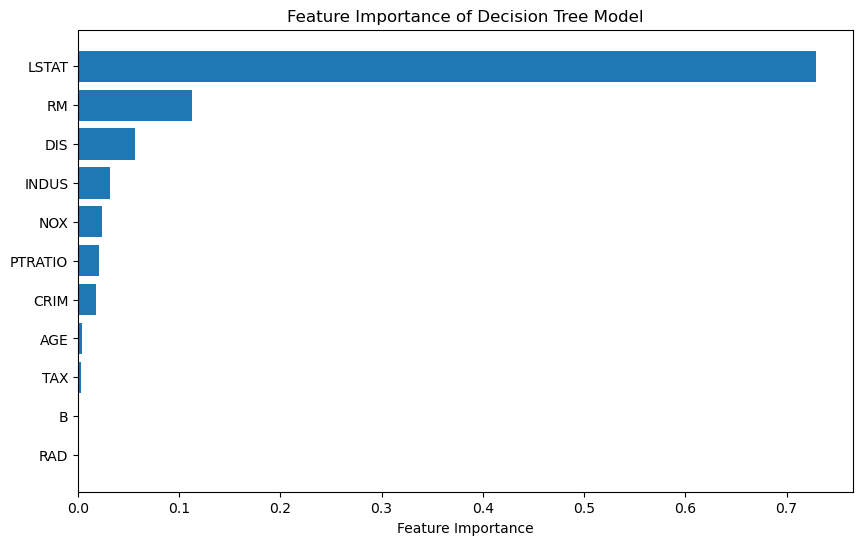

In [256]:
import matplotlib.pyplot as plt
import numpy as np

# Get the best estimator from the GridSearchCV model
best_dt = dt_grid.best_estimator_

# Feature importance from the best decision tree model
feature_importance = best_dt.feature_importances_

# Sort the importance in descending order
sorted_idx = np.argsort(feature_importance)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Decision Tree Model')
plt.show()


## RF

In [250]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train_transformed, y_train)

RandomForestRegressor(random_state=42)

In [251]:
# Predict on the train and test data
train_pred = rf.predict(X_train_transformed)
test_pred = rf.predict(X_test_transformed)

In [252]:
# Evaluate performance using R²
train_score = rf.score(X_train_transformed, y_train)
test_score = rf.score(X_test_transformed, y_test)

# Print results
print("Train R² score:", train_score)
print("Test R² score:", test_score)

Train R² score: 0.974223856149736
Test R² score: 0.8387505103617641


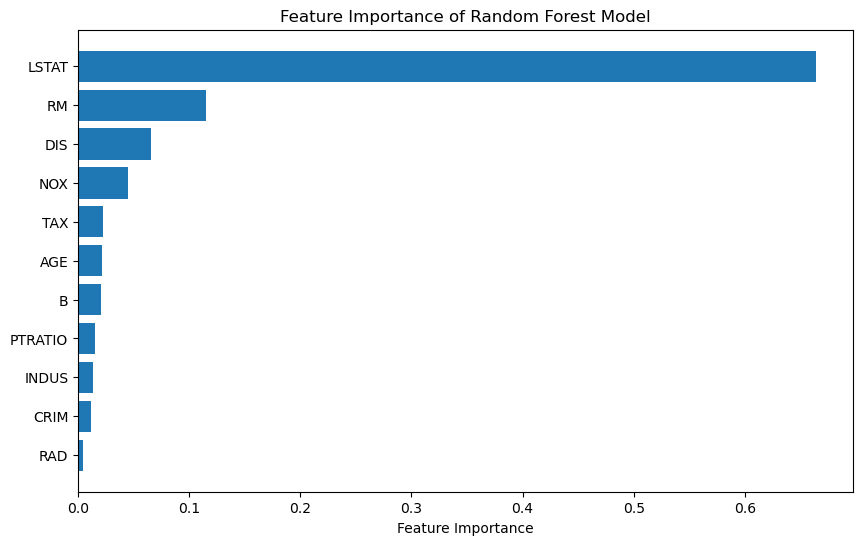

In [254]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from the RandomForest model
feature_importance = rf.feature_importances_

# Sort the importance in descending order
sorted_idx = np.argsort(feature_importance)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Random Forest Model')
plt.show()

## SVR

In [257]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf'], 
                     'C': [0.1, 1, 10], 
                     'epsilon': [0.01, 0.1, 0.2]}]

# Initialize SVR model with GridSearchCV
svr_grid = GridSearchCV(SVR(), 
                       param_grid=tuned_parameters, 
                       scoring='neg_mean_squared_error',  # For regression, use neg_MSE to minimize
                       cv=5,
                       verbose=1, 
                       return_train_score=True)

# Fit the model with training data
svr_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                          'kernel': ['linear', 'poly', 'rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [258]:
# Print the best parameters and estimator
print("Best parameters set found on train set:")
print(svr_grid.best_params_)
print(svr_grid.best_estimator_)
print()

Best parameters set found on train set:
{'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
SVR(C=10, epsilon=0.2)



In [262]:
# Prediction on train and test data
train_pred = svr_grid.predict(X_train_transformed)
test_pred = svr_grid.predict(X_test_transformed)

# Evaluate the performance
train_score = svr_grid.score(X_train_transformed, y_train)
test_score = svr_grid.score(X_test_transformed, y_test)

# Print R^2 scores
print('Train R^2 score:', train_score)
print('Test R^2 score:', test_score)

Train R^2 score: -15.189646569191236
Test R^2 score: -21.860020787604967


## ann


In [263]:
from keras.models import Sequential
from keras.layers import Dense

# Build the ANN model using Sequential
ann_model = Sequential()

# Input layer and first hidden layer
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
ann_model.add(Dense(units=32, activation='relu'))

# Output layer
ann_model.add(Dense(units=1, activation='linear'))  # For regression

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

2025-02-08 16:37:38.614678: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-02-08 16:37:38.614698: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-08 16:37:38.614703: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-08 16:37:38.614947: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-08 16:37:38.614955: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2025-02-08 16:37:39.207295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 606.4902 - mae: 22.7536
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 582.9296 - mae: 22.4395 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 591.7745 - mae: 22.6698
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 537.5051 - mae: 21.8424 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 562.7163 - mae: 22.1286 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 511.5663 - mae: 21.1839 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 505.2819 - mae: 21.2533 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 503.7264 - mae: 21.0560 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 499.6491 - mae: 20.7964 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 513.6528 - mae: 20.5930
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 477.8099 - mae: 19.9751 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 465.5641 - mae: 19.6648 
Epoch 13/50
1

In [265]:
# Prediction on train and test data
train_pred = ann_model.predict(X_train_transformed)
test_pred = ann_model.predict(X_test_transformed)

# Evaluate the performance using R^2 score
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

# Print R^2 scores
print('Train R^2 score:', train_score)
print('Test R^2 score:', test_score)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train R^2 score: 0.42073079811545633
Test R^2 score: 0.4109481758013428


# builing model using statsmodel

## Build a Multiple Linear Regression Model using statsmodels

1. **Load the Data**  
   - Import the dataset into the environment.

2. **Exploratory Data Analysis (EDA)**  
   - Understand the dataset by checking for missing values, distributions, correlations, and relationships between features.

3. **Data Preparation**  
   - Split the dataset into training and testing sets.

4. **Train the Model using statsmodels**  
   - Fit the Multiple Linear Regression model using statsmodels.

5. **Feature Selection**  
   - Perform manual feature selection based on p-values and Variance Inflation Factor (VIF). Techniques like Forward and Backward Feature Selection can be applied.

6. **Residual Analysis**  
   - Analyze the residuals of the model to check for any patterns, and ensure the assumptions of linear regression hold.

7. **Prediction on Test Data**  
   - Make predictions using the trained model on the test dataset.

8. **Model Evaluation**  
   - Evaluate the model’s performance using metrics such as RMSE (Root Mean Squared Error) and R-squared.


## Build a Multiple Linear Regression Model using statsmodels




**Build a Multiple Linear Regression Model using statsmodels**

1. **Load the Data**  
   - Import the dataset into the environment.

2. **Exploratory Data Analysis (EDA)**  
   - Understand the dataset by checking for missing values, distributions, correlations, and relationships between features.

3. **Data Preparation**  
   - Split the dataset into training and testing sets.

4. **Train the Model using statsmodels**  
   - Fit the Multiple Linear Regression model using statsmodels.

5. **Feature Selection**  
   - Perform manual feature selection based on p-values and Variance Inflation Factor (VIF). Techniques like Forward and Backward Feature Selection can be applied.

6. **Residual Analysis**  
   - Analyze the residuals of the model to check for any patterns, and ensure the assumptions of linear regression hold.

7. **Prediction on Test Data**  
   - Make predictions using the trained model on the test dataset.

8. **Model Evaluation**  
   - Evaluate the model’s performance using metrics such as RMSE (Root Mean Squared Error) and R-squared.


In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
df = pd.read_csv('data/boston.csv')

df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [272]:

# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(404, 14)
(102, 14)


In [274]:
y_train = df_train.pop('PRICE')
X_train = df_train

In [275]:
X_train.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
220   0.35809   0.0   6.20   1.0  0.507  6.951  88.5  2.8617   8.0  307.0   
71    0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873   4.0  305.0   
240   0.11329  30.0   4.93   0.0  0.428  6.897  54.3  6.3361   6.0  300.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012  66.6  5.5605   5.0  311.0   
417  25.94060   0.0  18.10   0.0  0.679  5.304  89.1  1.6475  24.0  666.0   

     PTRATIO       B  LSTAT  
220     17.4  391.70   9.71  
71      19.2  376.94   9.88  
240     16.6  391.25  11.38  
6       15.2  395.60  12.43  
417     20.2  127.36  26.64

In [276]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [277]:
lr.params

const      38.091695
CRIM       -0.119443
ZN          0.044780
INDUS       0.005485
CHAS        2.340804
NOX       -16.123604
RM          3.708709
AGE        -0.003121
DIS        -1.386397
RAD         0.244178
TAX        -0.010990
PTRATIO    -1.045921
B           0.008110
LSTAT      -0.492793
dtype: float64

In [278]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          9.64e-117
Time:                        19:28:26   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0917      5.522      6.898      0.000      27.234      48.949
CRIM          -0.1194      0.037     -3.257      0.001      -0.192      -0.047
ZN             0.0448      0.014      3.102      0.002       0.016       0.073
INDUS          0.0055      0.063      0.087      0.931      -0.119       0.130
CHAS           2.3408      0.902      2.595      0.010       0.567       4.115
NOX          -16.1236      4.212     -3.828      0.000     -24.404      -7.843
RM             3.7087      0.458      8.106      0.000       2.809       4.608
AGE           -0.0031      0.014     -0.218      0.828      -0.031       0.025
DIS           -1.3864      0.214     -6.480      0.000      -1.807      -0.966
RAD            0.2442      0.070      3.481      0.001       0.106       0.382
TAX           -0.0110      0.004     -2.819      0.005      -0.019      -0.003
PTRATIO       -1.0459      0.137     -7.636      0.000      -1.315      -0.777
B              0.0081      0.003      2.749      0.006       0.002       0.014
LSTAT         -0.4928      0.054     -9.086      0.000      -0.599      -0.386
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Understanding the Statistical Summary of the Model

We are interested in the following values:

1. **Coefficient and its p-value**  
   - If the p-value of a coefficient is less than 0.05, it indicates that the feature is **statistically significant**.
   - Based on this, we can infer that the **INDUS** and **AGE** features can be removed as their p-values are higher than 0.05.

2. **R-Square Value**  
   - The R-square value is **0.773**, which means that **77.3% of the variance in the target variable (Price)** is explained by the features included in the model.

3. **p-value of F Statistics**  
   - The F-statistic has a very **low p-value**, which indicates that the overall model is **statistically significant**.


### Forward Feature Selection

In [279]:
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[['RM']])

# Create a first model
lr = sm.OLS(y_train, X_train_sm).fit()

In [280]:
lr.params

const   -36.476190
RM        9.376384
dtype: float64

In [281]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     397.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           5.64e-62
Time:                        19:30:28   Log-Likelihood:                -1332.2
No. Observations:                 404   AIC:                             2668.
Df Residuals:                     402   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.4762      2.982    -12.231      0.000     -42.339     -30.613
RM             9.3764      0.470     19.933      0.000       8.452      10.301
==============================================================================
Omnibus:                       66.615   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.894
Skew:                           0.458   Prob(JB):                    6.12e-100
Kurtosis:                       8.129   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

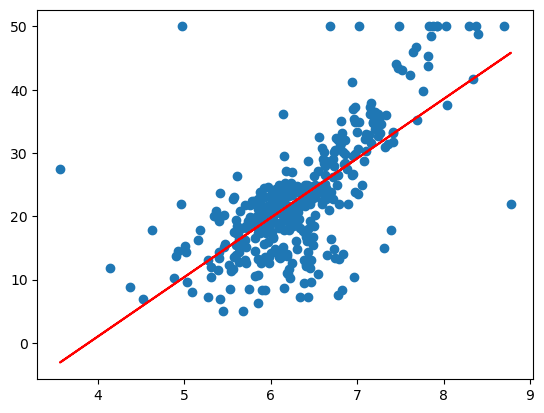

In [282]:
plt.scatter(X_train_sm.loc[:, 'RM'], y_train)

plt.plot(X_train_sm.loc[:, 'RM'], -36.476190 + 9.376384 * X_train_sm.loc[:, 'RM'], 'r')

plt.show()

In [283]:
# Add LSTAT to the data and try to rebuild the model

X_train_sm = sm.add_constant(X_train[['RM', 'LSTAT']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [284]:
lr.params

const   -1.262529
RM       5.109068
LSTAT   -0.654949
dtype: float64

In [285]:
np.round(lr.pvalues, 3)

const    0.719
RM       0.000
LSTAT    0.000
dtype: float64

In [287]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     392.5
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           3.83e-95
Time:                        19:32:35   Log-Likelihood:                -1252.0
No. Observations:                 404   AIC:                             2510.
Df Residuals:                     401   BIC:                             2522.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2625      3.513     -0.359      0.719      -8.168       5.643
RM             5.1091      0.492     10.379      0.000       4.141       6.077
LSTAT         -0.6549      0.047    -13.979      0.000      -0.747      -0.563
==============================================================================
Omnibus:                       88.171   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.848
Skew:                           1.088   Prob(JB):                     2.71e-46
Kurtosis:                       5.780   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Backward Feature Selection

In [291]:
# Lets add all the variables and see

X_train_sm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const      38.091695
CRIM       -0.119443
ZN          0.044780
INDUS       0.005485
CHAS        2.340804
NOX       -16.123604
RM          3.708709
AGE        -0.003121
DIS        -1.386397
RAD         0.244178
TAX        -0.010990
PTRATIO    -1.045921
B           0.008110
LSTAT      -0.492793
dtype: float64

In [292]:
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          9.64e-117
Time:                        19:34:39   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0917      5.522      6.898      0.000      27.234      48.949
CRIM          -0.1194      0.037     -3.257      0.001      -0.192      -0.047
ZN             0.0448      0.014      3.102      0.002       0.016       0.073
INDUS          0.0055      0.063      0.087      0.931      -0.119       0.130
CHAS           2.3408      0.902      2.595      0.010       0.567       4.115
NOX          -16.1236      4.212     -3.828      0.000     -24.404      -7.843
RM             3.7087      0.458      8.106      0.000       2.809       4.608
AGE           -0.0031      0.014     -0.218      0.828      -0.031       0.025
DIS           -1.3864      0.214     -6.480      0.000      -1.807      -0.966
RAD            0.2442      0.070      3.481      0.001       0.106       0.382
TAX           -0.0110      0.004     -2.819      0.005      -0.019      -0.003
PTRATIO       -1.0459      0.137     -7.636      0.000      -1.315      -0.777
B              0.0081      0.003      2.749      0.006       0.002       0.014
LSTAT         -0.4928      0.054     -9.086      0.000      -0.599      -0.386
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

Features    VIF
0      CRIM   2.10
1        ZN   2.93
2     INDUS  13.94
3      CHAS   1.14
4       NOX  80.58
5        RM  81.17
6       AGE  22.84
7       DIS  14.80
8       RAD  14.92
9       TAX  58.05
10  PTRATIO  87.89
11        B  21.83
12    LSTAT  11.32

In [295]:
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10  PTRATIO  87.89
5        RM  81.17
4       NOX  80.58
9       TAX  58.05
6       AGE  22.84
11        B  21.83
8       RAD  14.92
7       DIS  14.80
2     INDUS  13.94
12    LSTAT  11.32
1        ZN   2.93
0      CRIM   2.10
3      CHAS   1.14

In [296]:
np.round(lr.pvalues, 3)

const      0.000
CRIM       0.001
ZN         0.002
INDUS      0.931
CHAS       0.010
NOX        0.000
RM         0.000
AGE        0.828
DIS        0.000
RAD        0.001
TAX        0.005
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64

In [297]:
X = X_train.copy()

In [302]:
X = X.drop('AGE', axis=1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const      0.000
CRIM       0.001
ZN         0.002
INDUS      0.928
CHAS       0.010
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.001
TAX        0.005
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64
####################
   Features    VIF
9   PTRATIO  87.88
5        RM  78.24
4       NOX  73.45
8       TAX  58.04
10        B  21.69
7       RAD  14.89
2     INDUS  13.93
6       DIS  13.07
11    LSTAT   9.95
1        ZN   2.86
0      CRIM   2.10
3      CHAS   1.14


In [303]:
X = X.drop('INDUS', axis = 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const      0.000
CRIM       0.001
ZN         0.002
CHAS       0.009
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.000
TAX        0.002
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64
####################
   Features    VIF
8   PTRATIO  85.98
4        RM  74.88
3       NOX  67.90
7       TAX  45.96
9         B  21.63
6       RAD  13.44
5       DIS  12.09
10    LSTAT   9.92
1        ZN   2.84
0      CRIM   2.10
2      CHAS   1.13


In [305]:
X = X.drop('PTRATIO', axis = 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.004
CRIM     0.004
ZN       0.000
CHAS     0.003
NOX      0.057
RM       0.000
DIS      0.000
RAD      0.019
TAX      0.000
B        0.032
LSTAT    0.000
dtype: float64
####################
  Features    VIF
3      NOX  67.81
4       RM  59.15
7      TAX  42.73
8        B  19.83
6      RAD  13.44
5      DIS   9.69
9    LSTAT   8.62
1       ZN   2.36
0     CRIM   2.10
2     CHAS   1.12


In [306]:
X = X.drop('NOX', axis = 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.026
CRIM     0.006
ZN       0.000
CHAS     0.004
RM       0.000
DIS      0.000
RAD      0.025
TAX      0.000
B        0.021
LSTAT    0.000
dtype: float64
####################
  Features    VIF
6      TAX  37.30
3       RM  31.66
7        B  19.43
5      RAD  13.39
4      DIS   8.55
8    LSTAT   6.38
1       ZN   2.30
0     CRIM   2.08
2     CHAS   1.12


In [307]:
X = X.drop('TAX', axis = 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.599
CRIM     0.014
ZN       0.000
CHAS     0.001
RM       0.000
DIS      0.000
RAD      0.006
B        0.017
LSTAT    0.000
dtype: float64
####################
  Features    VIF
3       RM  27.01
6        B  19.02
4      DIS   8.43
7    LSTAT   5.15
5      RAD   4.38
1       ZN   2.30
0     CRIM   2.07
2     CHAS   1.11


In [308]:
X = X.drop('RM', axis = 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.000
CRIM     0.065
ZN       0.000
CHAS     0.000
DIS      0.000
RAD      0.026
B        0.225
LSTAT    0.000
dtype: float64
####################
  Features   VIF
5        B  8.17
3      DIS  7.60
6    LSTAT  4.96
4      RAD  3.71
1       ZN  2.28
0     CRIM  2.07
2     CHAS  1.10


In [309]:
y_train_pred = lr.predict(X_train_sm)

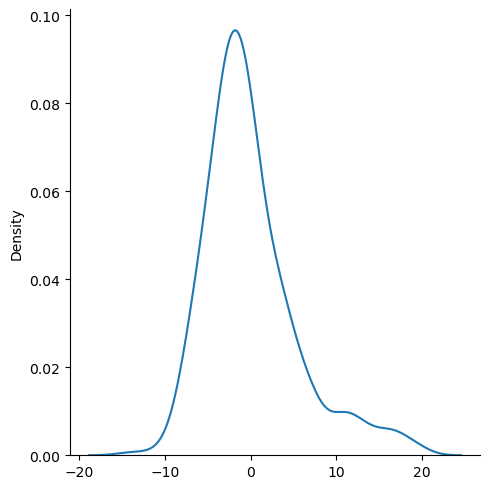

In [310]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

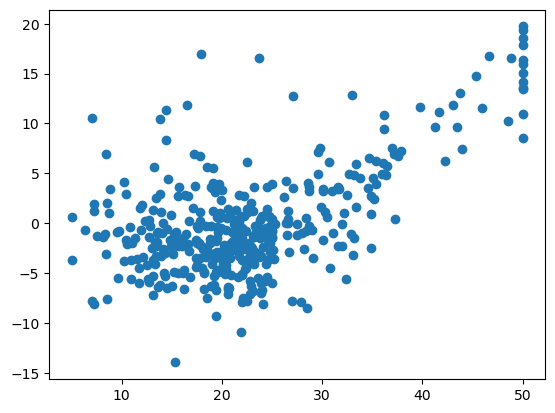

In [311]:
plt.scatter(y_train, residual)

plt.show()

<Axes: xlabel='PRICE', ylabel='Count'>

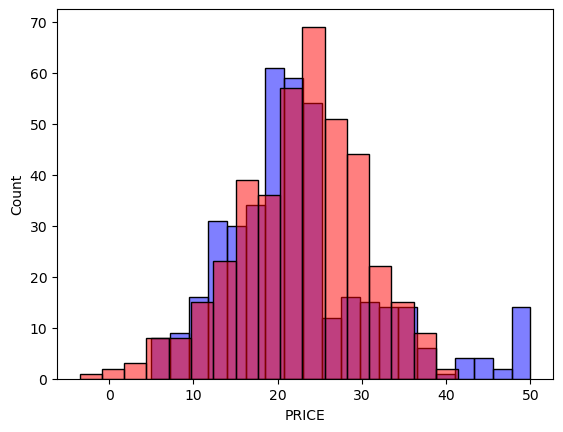

In [312]:
import seaborn as sns

sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5)

In [313]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.836491873962372
Mean Squared Error:  46.77395617801627
Root Mean Squared Error:  6.839148790457499


In [314]:
print(metrics.r2_score(y_test, y_test_pred))

0.3621772372528683


## 3. Automatic Feature Selection (RFE - Recursive Feature Elimination)

In [315]:
from sklearn.linear_model import LinearRegression

regressor_temp = LinearRegression()

In [316]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, n_features_to_select=7)

rfe = rfe.fit(X_train, y_train)

In [317]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

Columns  Included  Ranking
0      CRIM      True        1
1        ZN     False        3
2     INDUS     False        6
3      CHAS      True        1
4       NOX      True        1
5        RM      True        1
6       AGE     False        7
7       DIS      True        1
8       RAD     False        2
9       TAX     False        4
10  PTRATIO      True        1
11        B     False        5
12    LSTAT      True        1

In [318]:
imp_col = X_train.columns[rfe.support_]

imp_col

Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [319]:
X_train_rfe = df_train[imp_col]

X_train_rfe.head()

CRIM  CHAS    NOX     RM     DIS  PTRATIO  LSTAT
220   0.35809   1.0  0.507  6.951  2.8617     17.4   9.71
71    0.15876   0.0  0.413  5.961  5.2873     19.2   9.88
240   0.11329   0.0  0.428  6.897  6.3361     16.6  11.38
6     0.08829   0.0  0.524  6.012  5.5605     15.2  12.43
417  25.94060   0.0  0.679  5.304  1.6475     20.2  26.64

In [320]:
from sklearn.linear_model import LinearRegression
regressor_rfe = LinearRegression()
regressor_rfe.fit(X_train_rfe, y_train)

LinearRegression()

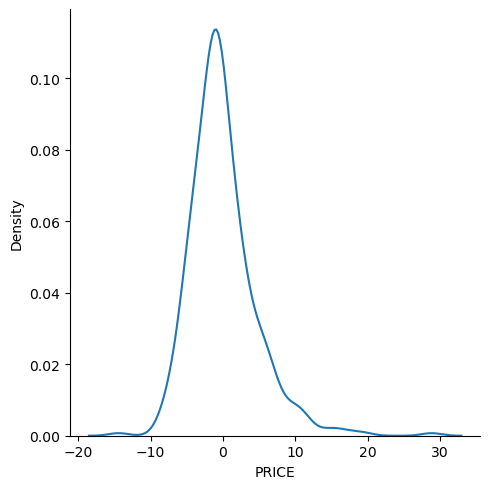

In [321]:
y_train_pred_rfe = regressor_rfe.predict(X_train_rfe)

residual = y_train - y_train_pred_rfe

sns.displot(residual, kind='kde')

In [322]:
X_test_rfe = df_test[imp_col]

y_test_pred_rfe = regressor_rfe.predict(X_test_rfe)

In [326]:
temp_df_rfe = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_rfe})
temp_df_rfe

Actual  Predicted
173    23.6  27.565362
274    32.4  22.721940
491    13.6  29.759904
72     22.8  10.920656
452    16.1  23.120891
..      ...        ...
412    17.9  24.874779
436     9.6  17.040353
411    17.2  16.976280
86     22.5  25.565831
75     21.4  22.903458

[102 rows x 2 columns]

In [327]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_rfe))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_rfe))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe)))

Mean Absolute Error:  8.577675609172491
Mean Squared Error:  137.83965523139926
Root Mean Squared Error:  11.740513414301747


In [328]:
print(metrics.r2_score(y_test, y_test_pred_rfe))

-0.8796201326481823


## 4. Principal Component Analysis

<Axes: >

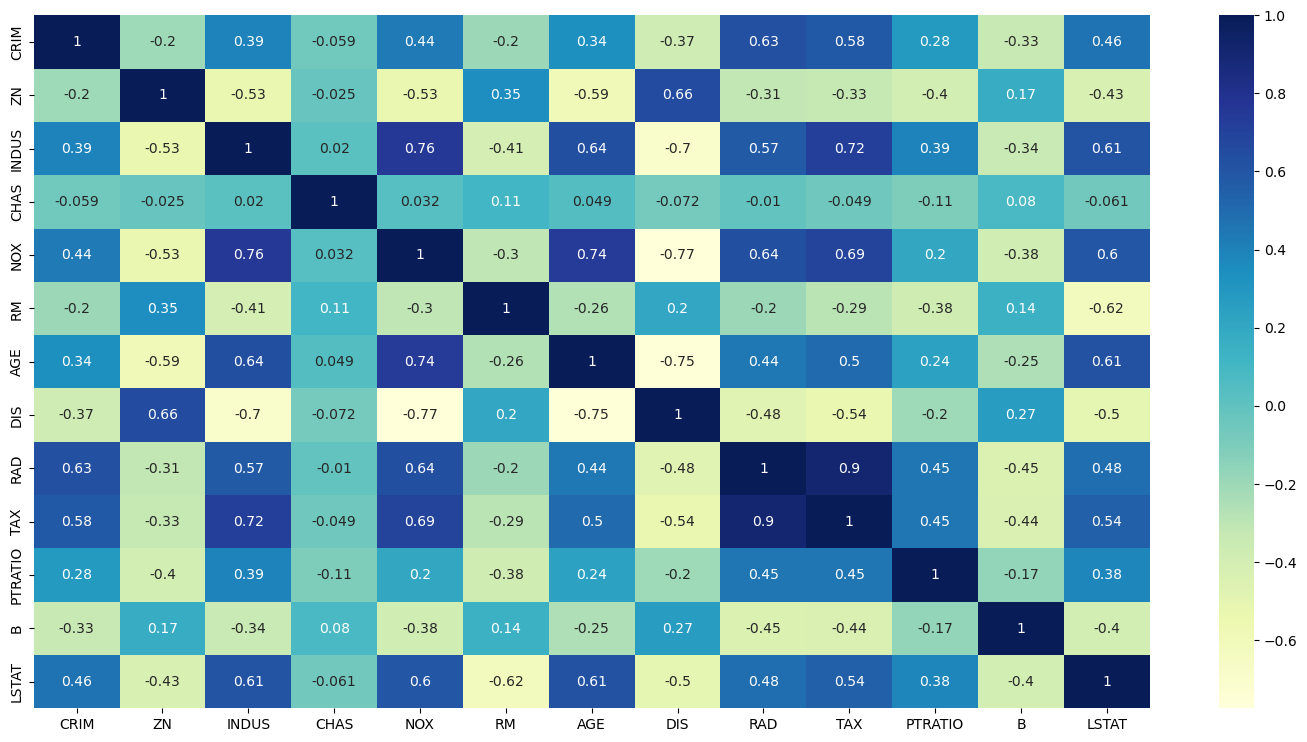

In [329]:
plt.figure(figsize=(18, 9))

sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

In [330]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 0)

pca.fit(X_train)

PCA(random_state=0)

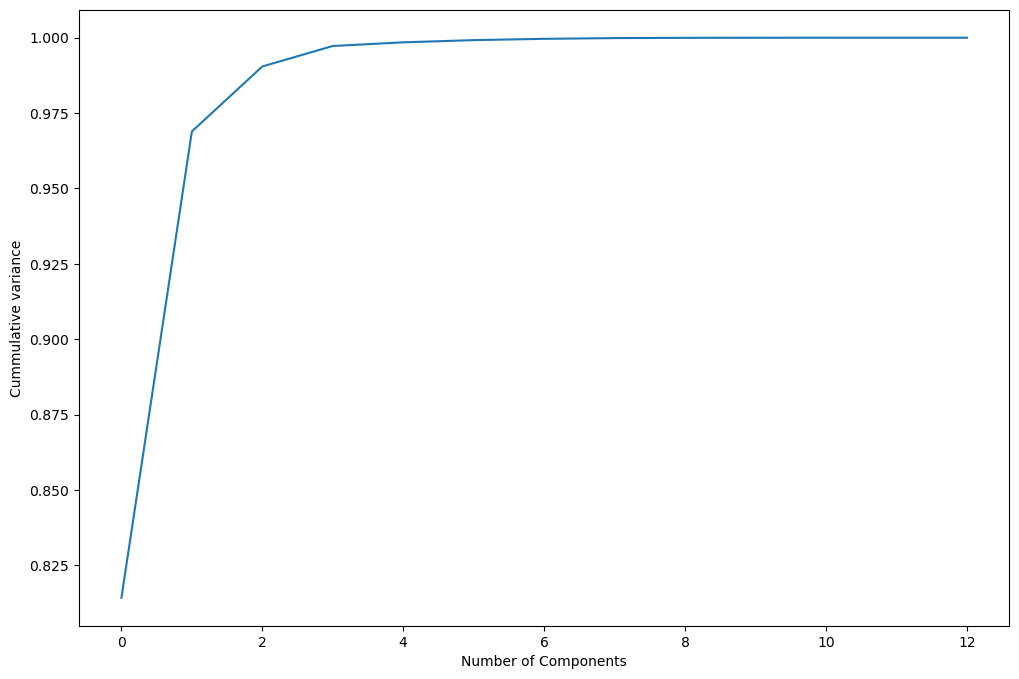

In [331]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [332]:
np.cumsum(pca.explained_variance_ratio_)

array([0.81427813, 0.9689209 , 0.99047253, 0.99725536, 0.99847138,
       0.99920317, 0.99963167, 0.9998757 , 0.99996255, 0.9999922 ,
       0.99999835, 0.99999993, 1.        ])

In [333]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 5, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [334]:
X_train_pca.shape

(404, 5)

<Axes: >

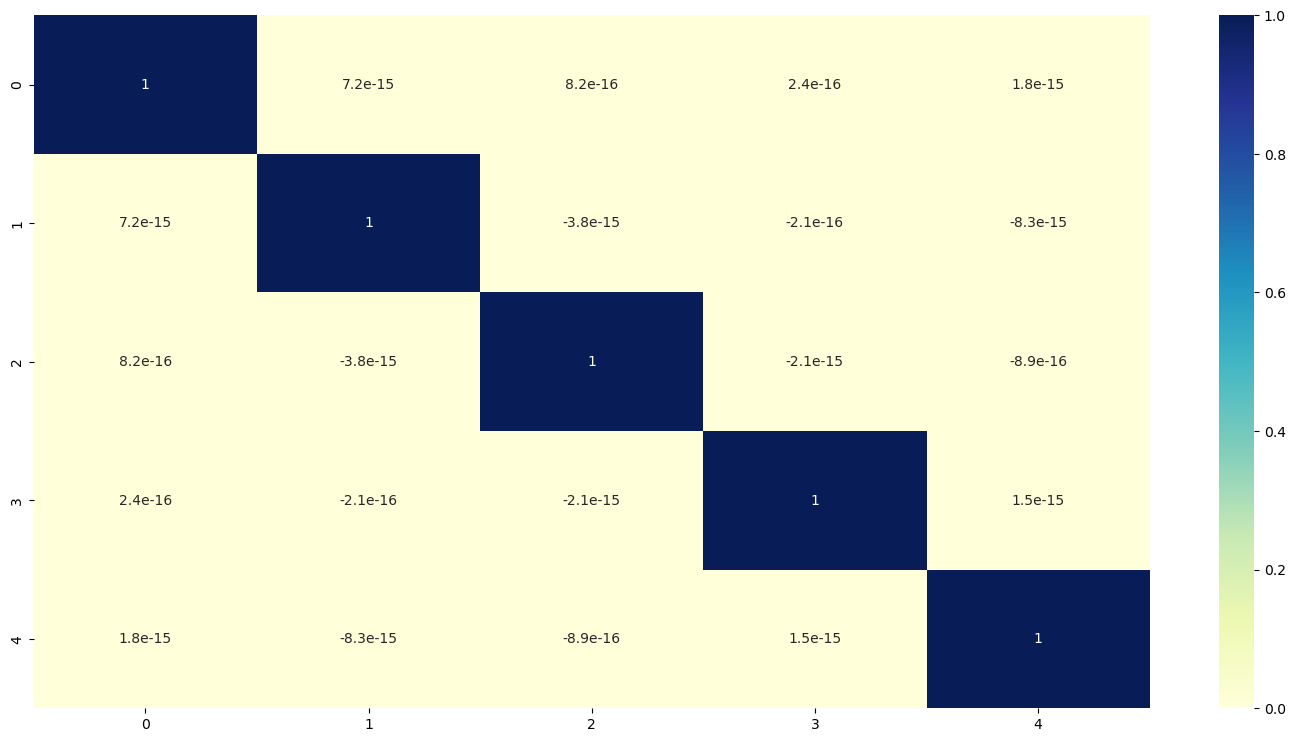

In [335]:
corrmat = np.corrcoef(X_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu", annot=True)

In [341]:
df_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [342]:
X_test = df_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [344]:
X_test_pca = pca_final.transform(X_test)

In [345]:
# Building the final model with 3 features

from sklearn.linear_model import LinearRegression

regressor_pca = LinearRegression()

regressor_pca.fit(X_train_pca, y_train)

LinearRegression()

In [346]:
# print coefficients and intercept

print(regressor_pca.coef_)

print(regressor_pca.intercept_)

[-0.02755174  0.00968575 -0.07709497  0.04997656 -0.28366225]
22.61188118811881


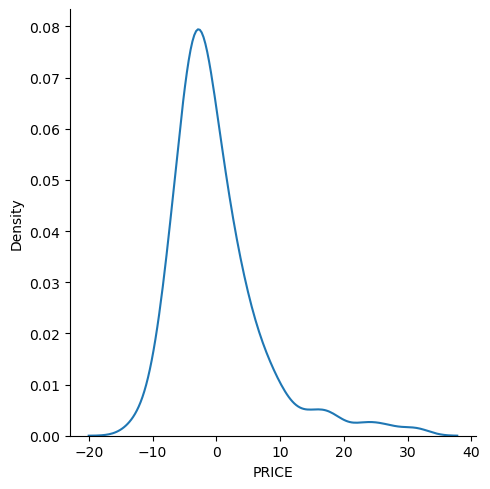

In [347]:
# Residual Analysis on Training Data

y_train_pred_pca = regressor_pca.predict(X_train_pca)

residual_pca = y_train - y_train_pred_pca

sns.displot(residual_pca, kind='kde')

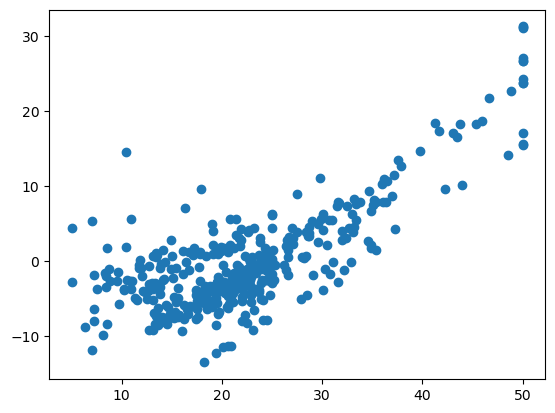

In [349]:
plt.scatter(y_train, residual_pca)

plt.show()

In [351]:
# Prediction

y_test_pred_pca = regressor_pca.predict(X_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})

temp_df.head()

Actual  Predicted
173    23.6  23.839599
274    32.4  17.076042
491    13.6  24.016867
72     22.8  12.456989
452    16.1  23.307379

In [352]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_pca)))

Mean Absolute Error:  7.9884169825492535
Mean Squared Error:  114.9923585283611
Root Mean Squared Error:  10.72344900339257


## 5. Lasso Regularisation

In [356]:
from sklearn.linear_model import Lasso

In [357]:
regressor_lasso = Lasso(alpha=10.0)

regressor_lasso.fit(X_train, y_train)

Lasso(alpha=10.0)

In [358]:
print(regressor_lasso.intercept_)

print(regressor_lasso.coef_)

print(X_train.columns)

31.253257605149237
[-0.          0.03971165 -0.          0.          0.          0.
  0.         -0.          0.         -0.01160619 -0.          0.00655178
 -0.5339883 ]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [359]:
importance = regressor_lasso.coef_

features = X_train.columns

print(np.array(features)[importance != 0])

print(np.array(features)[importance == 0])

['ZN' 'TAX' 'B' 'LSTAT']
['CRIM' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'PTRATIO']


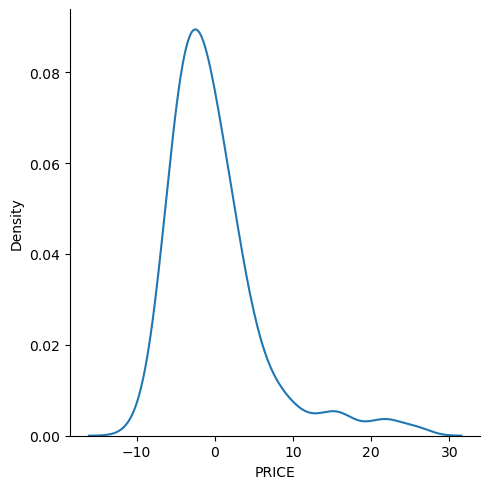

In [360]:
# Residual Analysis on Training Data

y_train_pred_lasso = regressor_lasso.predict(X_train)

residual_lasso = y_train - y_train_pred_lasso

sns.displot(residual_lasso, kind='kde')

In [361]:
# Prediction

y_test_pred_lasso = regressor_lasso.predict(X_test)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_lasso})

temp_df.head()

Actual  Predicted
173    23.6  24.801415
274    32.4  20.833560
491    13.6  25.022770
72     22.8  15.566987
452    16.1  22.576186

In [362]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_lasso))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_lasso))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso)))

Mean Absolute Error:  7.6555094549166744
Mean Squared Error:  107.23886497331804
Root Mean Squared Error:  10.355619970495153


In [364]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [365]:
predictions = model_rf.predict(X_test)

In [366]:
model_rf.feature_importances_

array([0.04205754, 0.00096975, 0.00806548, 0.00111066, 0.02083278,
       0.38076484, 0.01174033, 0.03768326, 0.00396472, 0.01629479,
       0.02364743, 0.00979993, 0.44306849])

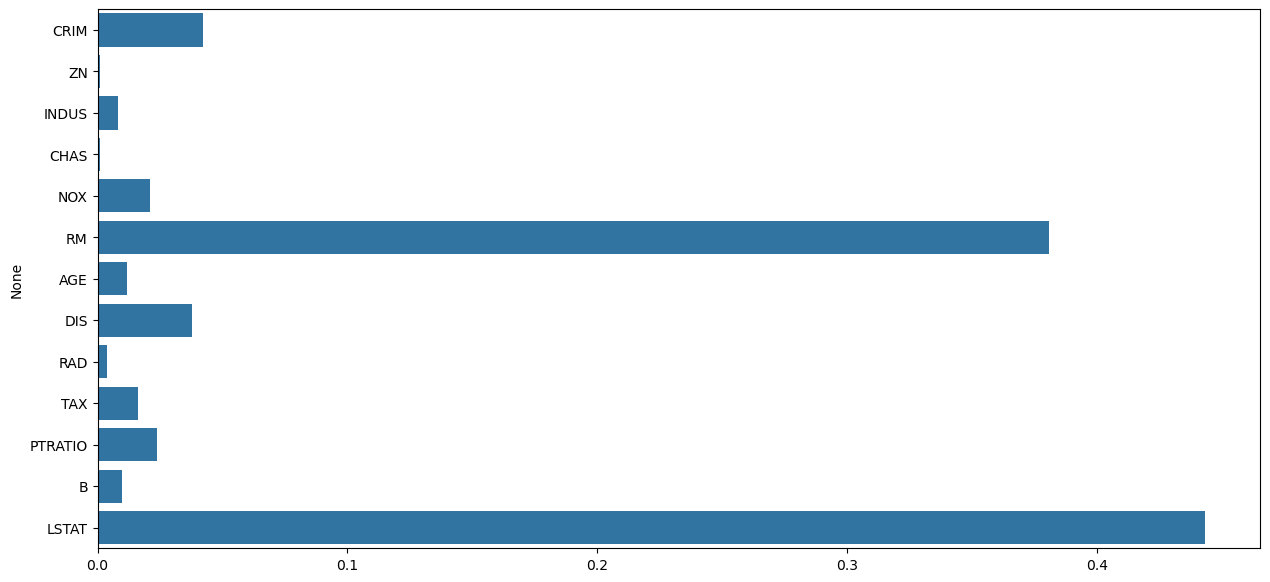

In [367]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train.columns, )
plt.show();